# Importando Bibliotecas

## Basico

In [246]:
import geopandas as gpd

In [247]:
import pandas as pd

In [248]:
import matplotlib.pyplot as plt

In [249]:
%matplotlib inline

In [250]:
import os

In [251]:
os.chdir("../data/")

# Transformando DataFrame em GeoDataFrame

## Tratando Dados de Vendas

In [252]:
dados = pd.read_csv('interim/Controle_Vendas.csv', sep=';', decimal=",", encoding="utf-8")

In [253]:
dados.head()

PEDIDO    DATA      CLIENTE                ENDERECO                 BAIRRO  \
0   100.0  01/mai          NaN            RUA PORTUGAL         CASCAVEL VELHO   
1   101.0  01/mai          NaN   RUA IRACI VIGANO, 281           PARQUE VERDE   
2   102.0  01/mai          NaN     TREZE DE MAIO, 1672                    NaN   
3   103.0  04/mai  JOSI POMINI  RUA VASCO DA GAMA, 396  PIONEIROS CATARINENSE   
4   104.0  04/mai          NaN    RUA DOS PARDAIS, 580               FLORESTA   

    TOTAL_PRODUTO    COMISSÃO    FRETE    OUTROS    DESCONTO    TOTAL   PAGO   \
0             30.0         NaN      NaN       NaN         NaN     30.0    SIM   
1             18.0         NaN      NaN       NaN         NaN     18.0    SIM   
2             18.0         NaN      NaN       NaN         NaN     18.0    SIM   
3             30.0         NaN      NaN       NaN         NaN     30.0    SIM   
4             10.5         NaN      3.5       NaN         NaN     14.0    SIM   

   OBSERVACAO    LATITUDE   LONGITUDE   
0          NaN                          
1          NaN  -24,94462   -53,49701   
2          NaN  -24,94257   -53,44476   
3          NaN  -24,97480   -53,48962   
4          NaN  -24,91047   -53,42232

In [254]:
type(dados)

pandas.core.frame.DataFrame

In [255]:
dados.dtypes

PEDIDO             float64
DATA                object
CLIENTE             object
ENDERECO            object
BAIRRO              object
 TOTAL_PRODUTO     float64
 COMISSÃO          float64
 FRETE             float64
 OUTROS            float64
 DESCONTO          float64
 TOTAL             float64
 PAGO               object
 OBSERVACAO         object
 LATITUDE           object
 LONGITUDE          object
dtype: object

In [256]:
dados = dados.rename(columns={' TOTAL_PRODUTO ': 'TOTAL_PROD'})
dados = dados.rename(columns={' COMISSÃO ': 'COMISSAO'})
dados = dados.rename(columns={' FRETE ': 'FRETE'})
dados = dados.rename(columns={' OUTROS ': 'OUTROS'})
dados = dados.rename(columns={' DESCONTO ': 'DESCONTO'})
dados = dados.rename(columns={' TOTAL ': 'TOTAL'})
dados = dados.rename(columns={' PAGO ': 'PAGO'})
dados = dados.rename(columns={' OBSERVACAO ': 'OBSERVACAO'})
dados = dados.rename(columns={' LATITUDE ': 'LATITUDE'})
dados = dados.rename(columns={' LONGITUDE ': 'LONGITUDE'})

In [257]:
dados.dtypes

PEDIDO        float64
DATA           object
CLIENTE        object
ENDERECO       object
BAIRRO         object
TOTAL_PROD    float64
COMISSAO      float64
FRETE         float64
OUTROS        float64
DESCONTO      float64
TOTAL         float64
PAGO           object
OBSERVACAO     object
LATITUDE       object
LONGITUDE      object
dtype: object

In [258]:
type(dados)

pandas.core.frame.DataFrame

In [259]:
dados['LATITUDE'] = [x.replace(",", ".") for x in dados['LATITUDE']]

In [260]:
dados['LONGITUDE'] = [x.replace(",", ".") for x in dados['LONGITUDE']]

In [261]:
dados.head()

PEDIDO    DATA      CLIENTE                ENDERECO                 BAIRRO  \
0   100.0  01/mai          NaN            RUA PORTUGAL         CASCAVEL VELHO   
1   101.0  01/mai          NaN   RUA IRACI VIGANO, 281           PARQUE VERDE   
2   102.0  01/mai          NaN     TREZE DE MAIO, 1672                    NaN   
3   103.0  04/mai  JOSI POMINI  RUA VASCO DA GAMA, 396  PIONEIROS CATARINENSE   
4   104.0  04/mai          NaN    RUA DOS PARDAIS, 580               FLORESTA   

   TOTAL_PROD  COMISSAO  FRETE  OUTROS  DESCONTO  TOTAL PAGO OBSERVACAO  \
0        30.0       NaN    NaN     NaN       NaN   30.0  SIM        NaN   
1        18.0       NaN    NaN     NaN       NaN   18.0  SIM        NaN   
2        18.0       NaN    NaN     NaN       NaN   18.0  SIM        NaN   
3        30.0       NaN    NaN     NaN       NaN   30.0  SIM        NaN   
4        10.5       NaN    3.5     NaN       NaN   14.0  SIM        NaN   

     LATITUDE   LONGITUDE  
0                          
1  -24.94462   -53.49701   
2  -24.94257   -53.44476   
3  -24.97480   -53.48962   
4  -24.91047   -53.42232

In [262]:
dados['COMISSAO'] = dados['COMISSAO'].fillna(0)
dados['FRETE'] = dados['FRETE'].fillna(0)
dados['OUTROS'] = dados['OUTROS'].fillna(0)
dados['DESCONTO'] = dados['DESCONTO'].fillna(0)

In [263]:
dados.head()

PEDIDO    DATA      CLIENTE                ENDERECO                 BAIRRO  \
0   100.0  01/mai          NaN            RUA PORTUGAL         CASCAVEL VELHO   
1   101.0  01/mai          NaN   RUA IRACI VIGANO, 281           PARQUE VERDE   
2   102.0  01/mai          NaN     TREZE DE MAIO, 1672                    NaN   
3   103.0  04/mai  JOSI POMINI  RUA VASCO DA GAMA, 396  PIONEIROS CATARINENSE   
4   104.0  04/mai          NaN    RUA DOS PARDAIS, 580               FLORESTA   

   TOTAL_PROD  COMISSAO  FRETE  OUTROS  DESCONTO  TOTAL PAGO OBSERVACAO  \
0        30.0       0.0    0.0     0.0       0.0   30.0  SIM        NaN   
1        18.0       0.0    0.0     0.0       0.0   18.0  SIM        NaN   
2        18.0       0.0    0.0     0.0       0.0   18.0  SIM        NaN   
3        30.0       0.0    0.0     0.0       0.0   30.0  SIM        NaN   
4        10.5       0.0    3.5     0.0       0.0   14.0  SIM        NaN   

     LATITUDE   LONGITUDE  
0                          
1  -24.94462   -53.49701   
2  -24.94257   -53.44476   
3  -24.97480   -53.48962   
4  -24.91047   -53.42232

In [264]:
dados.isnull().sum() #valores nulos

PEDIDO          0
DATA            0
CLIENTE       217
ENDERECO       40
BAIRRO        155
TOTAL_PROD      0
COMISSAO        0
FRETE           0
OUTROS          0
DESCONTO        0
TOTAL           0
PAGO          280
OBSERVACAO    351
LATITUDE        0
LONGITUDE       0
dtype: int64

In [265]:
dados.shape

(371, 15)

In [266]:
dados[dados['ENDERECO'].isna()] # endereços em branco

PEDIDO        DATA              CLIENTE ENDERECO                 BAIRRO  \
7     107.0      11/mai              SILVANA      NaN             SANTA CRUZ   
9     109.0      11/mai                  NaN      NaN             SANTA CRUZ   
14    114.0      12/mai                  NaN      NaN                    NaN   
16    116.0      15/mai                LEILA      NaN                 CENTRO   
17    117.0      15/mai                  NaN      NaN              COQUEIRAL   
18    118.0      15/mai                  NaN      NaN            PAULO GODOY   
21    121.0      18/mai                  NaN      NaN               RIVIEIRA   
32    132.0      01/jun                  NaN      NaN           XIV NOVEMBRO   
33    133.0      01/jun                  NaN      NaN                    NaN   
35    135.0      01/jun          ROSI - GABI      NaN                    NaN   
40    140.0      08/jun                  NaN      NaN               CLAUDETE   
42    142.0      09/jun                  NaN      NaN       SANTA FELICIDADE   
44    144.0      12/jun               ARIANE      NaN                    NaN   
45    145.0      12/jun               ARIANE      NaN                    NaN   
51    151.0      15/jun             ANGELICA      NaN              A RETIRAR   
55    155.0      22/jun             ANGELICA      NaN              A RETIRAR   
58    158.0      29/jun                  NaN      NaN              ACLIMAÇÃO   
61    161.0      30/jun              REVENDA      NaN         SANTOS DUMONTT   
62    162.0      13/jul              MARIELI      NaN                    NaN   
65    165.0      20/jul                  NaN      NaN               CANCELLI   
66    166.0      20/jul                  NaN      NaN               CLAUDETE   
68    168.0      20/jul                  NaN      NaN                GUARUJÁ   
69    169.0      20/jul                  NaN      NaN                GUARUJÁ   
71    171.0      20/jul                  NaN      NaN           SANTO ONOFRE   
73    173.0      21/jul                  NaN      NaN           PARQUE VERDE   
76    176.0      21/jul                  NaN      NaN               CANCELLI   
77    177.0      21/jul                  NaN      NaN           PARQUE VERDE   
79    179.0      21/jul                  NaN      NaN              COQUEIRAL   
80    180.0      21/jul                  NaN      NaN              COQUEIRAL   
81    181.0      21/jul                  NaN      NaN                COUNTRY   
82    182.0      21/jul                  NaN      NaN  PIONEIROS CATARINENSE   
83    183.0      21/jul                  NaN      NaN               CANCELLI   
85    185.0      28/jul                  NaN      NaN          JARDIM ITÁLIA   
87    187.0      28/jul                  NaN      NaN              ACLIMAÇÃO   
89    189.0      28/jul                  NaN      NaN       PARQUE SÃO PAULO   
90    190.0      28/jul                  NaN      NaN                    NaN   
121   230.0  29/10/2019                  NaN      NaN                  SIENA   
141   249.0  09/11/2019    PATRICIA - GANDIN      NaN                    NaN   
169   277.0  22/11/2019  ZELADOR - SÃO LUCAS      NaN             SANTA CRUZ   
277   384.0      18/fev                  NaN      NaN             SANTA CRUZ   

     TOTAL_PROD  COMISSAO  FRETE  OUTROS  DESCONTO  TOTAL PAGO OBSERVACAO  \
7          15.0       0.0    0.0     0.0       0.0   15.0  SIM        NaN   
9          12.0       0.0    0.0     0.0       0.0   12.0  SIM        NaN   
14         22.5       0.0    0.0     0.0       7.5   15.0  SIM        NaN   
16         24.0       0.0    0.0     0.0       0.0   24.0  SIM     CABELO   
17          6.0       0.0    0.0     0.0       0.0    6.0  SIM        NaN   
18         21.0       0.0    0.0     0.0       0.0   21.0  SIM        NaN   
21         18.0       0.0    2.0     0.0       0.0   20.0  SIM        NaN   
32         32.8       0.0    0.0     0.0       0.3   32.5  SIM        NaN   
33         10.0       0.0    0.

In [267]:
dados = dados.dropna(subset=['ENDERECO'])

In [268]:
dados.shape

(331, 15)

In [269]:
dados.isnull().sum() #valores nulos

PEDIDO          0
DATA            0
CLIENTE       188
ENDERECO        0
BAIRRO        147
TOTAL_PROD      0
COMISSAO        0
FRETE           0
OUTROS          0
DESCONTO        0
TOTAL           0
PAGO          276
OBSERVACAO    312
LATITUDE        0
LONGITUDE       0
dtype: int64

In [270]:
dados.head()

PEDIDO    DATA      CLIENTE                ENDERECO                 BAIRRO  \
0   100.0  01/mai          NaN            RUA PORTUGAL         CASCAVEL VELHO   
1   101.0  01/mai          NaN   RUA IRACI VIGANO, 281           PARQUE VERDE   
2   102.0  01/mai          NaN     TREZE DE MAIO, 1672                    NaN   
3   103.0  04/mai  JOSI POMINI  RUA VASCO DA GAMA, 396  PIONEIROS CATARINENSE   
4   104.0  04/mai          NaN    RUA DOS PARDAIS, 580               FLORESTA   

   TOTAL_PROD  COMISSAO  FRETE  OUTROS  DESCONTO  TOTAL PAGO OBSERVACAO  \
0        30.0       0.0    0.0     0.0       0.0   30.0  SIM        NaN   
1        18.0       0.0    0.0     0.0       0.0   18.0  SIM        NaN   
2        18.0       0.0    0.0     0.0       0.0   18.0  SIM        NaN   
3        30.0       0.0    0.0     0.0       0.0   30.0  SIM        NaN   
4        10.5       0.0    3.5     0.0       0.0   14.0  SIM        NaN   

     LATITUDE   LONGITUDE  
0                          
1  -24.94462   -53.49701   
2  -24.94257   -53.44476   
3  -24.97480   -53.48962   
4  -24.91047   -53.42232

In [271]:
dados = dados[dados['LONGITUDE'] != '  ']

In [272]:
dados.head()

PEDIDO    DATA           CLIENTE                ENDERECO  \
1   101.0  01/mai               NaN   RUA IRACI VIGANO, 281   
2   102.0  01/mai               NaN     TREZE DE MAIO, 1672   
3   103.0  04/mai       JOSI POMINI  RUA VASCO DA GAMA, 396   
4   104.0  04/mai               NaN    RUA DOS PARDAIS, 580   
5   105.0  04/mai  JEFERSON SARRETA      RUA CURITIBA, 1540   

                  BAIRRO  TOTAL_PROD  COMISSAO  FRETE  OUTROS  DESCONTO  \
1           PARQUE VERDE        18.0       0.0    0.0     0.0       0.0   
2                    NaN        18.0       0.0    0.0     0.0       0.0   
3  PIONEIROS CATARINENSE        30.0       0.0    0.0     0.0       0.0   
4               FLORESTA        10.5       0.0    3.5     0.0       0.0   
5                   NEVA        37.5       0.0    0.0     0.0       0.0   

   TOTAL PAGO OBSERVACAO    LATITUDE   LONGITUDE  
1   18.0  SIM        NaN  -24.94462   -53.49701   
2   18.0  SIM        NaN  -24.94257   -53.44476   
3   30.0  SIM        NaN  -24.97480   -53.48962   
4   14.0  SIM        NaN  -24.91047   -53.42232   
5   37.5  SIM        NaN  -24.96158   -53.47200

In [273]:
dados[dados['LATITUDE'] == '  ']

Empty DataFrame
Columns: [PEDIDO, DATA, CLIENTE, ENDERECO, BAIRRO, TOTAL_PROD, COMISSAO, FRETE, OUTROS, DESCONTO, TOTAL, PAGO, OBSERVACAO, LATITUDE, LONGITUDE]
Index: []

In [274]:
dados.dtypes

PEDIDO        float64
DATA           object
CLIENTE        object
ENDERECO       object
BAIRRO         object
TOTAL_PROD    float64
COMISSAO      float64
FRETE         float64
OUTROS        float64
DESCONTO      float64
TOTAL         float64
PAGO           object
OBSERVACAO     object
LATITUDE       object
LONGITUDE      object
dtype: object

In [275]:
dados['LATITUDE'] = dados['LATITUDE'].astype('float64')

In [276]:
dados['LONGITUDE'] = dados['LONGITUDE'].astype('float64')

In [277]:
dados.head()

PEDIDO    DATA           CLIENTE                ENDERECO  \
1   101.0  01/mai               NaN   RUA IRACI VIGANO, 281   
2   102.0  01/mai               NaN     TREZE DE MAIO, 1672   
3   103.0  04/mai       JOSI POMINI  RUA VASCO DA GAMA, 396   
4   104.0  04/mai               NaN    RUA DOS PARDAIS, 580   
5   105.0  04/mai  JEFERSON SARRETA      RUA CURITIBA, 1540   

                  BAIRRO  TOTAL_PROD  COMISSAO  FRETE  OUTROS  DESCONTO  \
1           PARQUE VERDE        18.0       0.0    0.0     0.0       0.0   
2                    NaN        18.0       0.0    0.0     0.0       0.0   
3  PIONEIROS CATARINENSE        30.0       0.0    0.0     0.0       0.0   
4               FLORESTA        10.5       0.0    3.5     0.0       0.0   
5                   NEVA        37.5       0.0    0.0     0.0       0.0   

   TOTAL PAGO OBSERVACAO  LATITUDE  LONGITUDE  
1   18.0  SIM        NaN -24.94462  -53.49701  
2   18.0  SIM        NaN -24.94257  -53.44476  
3   30.0  SIM        NaN -24.97480  -53.48962  
4   14.0  SIM        NaN -24.91047  -53.42232  
5   37.5  SIM        NaN -24.96158  -53.47200

In [278]:
dados.dtypes

PEDIDO        float64
DATA           object
CLIENTE        object
ENDERECO       object
BAIRRO         object
TOTAL_PROD    float64
COMISSAO      float64
FRETE         float64
OUTROS        float64
DESCONTO      float64
TOTAL         float64
PAGO           object
OBSERVACAO     object
LATITUDE      float64
LONGITUDE     float64
dtype: object

In [279]:
from shapely.geometry import Point

In [280]:
x = zip(dados.LONGITUDE, dados.LATITUDE)

In [281]:
x

In [282]:
list(x)

[(-53.49701, -24.94462),
 (-53.44476, -24.94257),
 (-53.48962, -24.9748),
 (-53.42232, -24.91047),
 (-53.472, -24.96158),
 (-53.52493, -25.00321),
 (-53.48251, -24.95325),
 (-53.4871, -24.95473),
 (-53.4871, -24.95473),
 (-53.45267, -24.98536),
 (-53.52493, -25.00321),
 (-53.4709, -24.97737),
 (-53.46314, -24.93293),
 (-53.48853, -24.96233),
 (-53.48962, -24.9748),
 (-53.472, -24.96158),
 (-53.50231, -24.95349),
 (-53.48853, -24.96233),
 (-53.48251, -24.95325),
 (-53.45638, -24.97294),
 (-53.49973, -24.93657),
 (-53.49668, -24.98588),
 (-53.48464, -24.96487),
 (-53.4871, -24.95473),
 (-53.48853, -24.96233),
 (-53.48853, -24.96233),
 (-53.48464, -24.96487),
 (-53.48853, -24.96233),
 (-53.47582, -24.94406),
 (-53.48853, -24.96233),
 (-53.52493, -25.00321),
 (-53.4871, -24.95473),
 (-53.48251, -24.95325),
 (-53.50439, -24.96503),
 (-53.48251, -24.95325),
 (-53.49668, -24.98588),
 (-53.50558, -24.97129),
 (-53.48609, -24.99142),
 (-53.50439, -24.96503),
 (-53.48962, -24.9748),
 (-53.48853,

In [283]:
geometry = [Point(x) for x in zip(dados.LONGITUDE, dados.LATITUDE)]

In [284]:
geometry

In [285]:
crs = {'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}
geo_dados = gpd.GeoDataFrame(dados, crs = crs, geometry = geometry)

In [286]:
geo_dados.head()

PEDIDO    DATA           CLIENTE                ENDERECO  \
1   101.0  01/mai               NaN   RUA IRACI VIGANO, 281   
2   102.0  01/mai               NaN     TREZE DE MAIO, 1672   
3   103.0  04/mai       JOSI POMINI  RUA VASCO DA GAMA, 396   
4   104.0  04/mai               NaN    RUA DOS PARDAIS, 580   
5   105.0  04/mai  JEFERSON SARRETA      RUA CURITIBA, 1540   

                  BAIRRO  TOTAL_PROD  COMISSAO  FRETE  OUTROS  DESCONTO  \
1           PARQUE VERDE        18.0       0.0    0.0     0.0       0.0   
2                    NaN        18.0       0.0    0.0     0.0       0.0   
3  PIONEIROS CATARINENSE        30.0       0.0    0.0     0.0       0.0   
4               FLORESTA        10.5       0.0    3.5     0.0       0.0   
5                   NEVA        37.5       0.0    0.0     0.0       0.0   

   TOTAL PAGO OBSERVACAO  LATITUDE  LONGITUDE                     geometry  
1   18.0  SIM        NaN -24.94462  -53.49701  POINT (-53.49701 -24.94462)  
2   18.0  SIM        NaN -24.94257  -53.44476  POINT (-53.44476 -24.94257)  
3   30.0  SIM        NaN -24.97480  -53.48962  POINT (-53.48962 -24.97480)  
4   14.0  SIM        NaN -24.91047  -53.42232  POINT (-53.42232 -24.91047)  
5   37.5  SIM        NaN -24.96158  -53.47200  POINT (-53.47200 -24.96158)

In [287]:
type(geo_dados)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

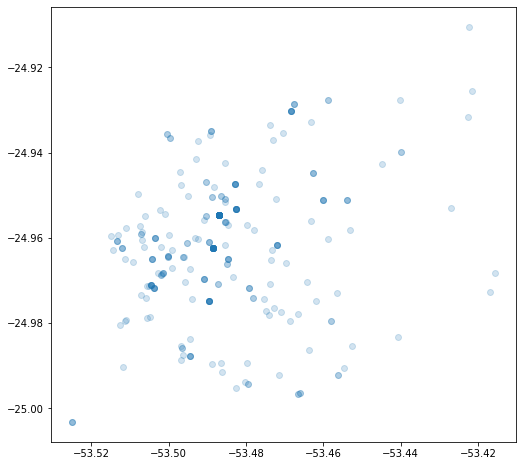

In [288]:
geo_dados.plot(figsize=(15, 8), alpha=0.2)

In [289]:
geo_dados.to_file('processed\DATASET.shp')

# Sistema de Coordenadas

https://www.spatialreference.org/ref/epsg/

https://www.spatialreference.org/ref/epsg/31982/proj4/

In [298]:
crs_zona22 = '+proj=utm +zone=22 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs'

In [299]:
cascavel = gpd.read_file('processed\CASCAVEL-MUNIC.shp')
#geo_dados = gpd.read_file('DATASET.shp')

In [300]:
cascavel

ID CD_GEOCODM NM_MUNICIP  \
0  246    4104808   CASCAVEL   

                                            geometry  
0  POLYGON ((242.542 7252.096, 241.431 7257.188, ...

<AxesSubplot:>

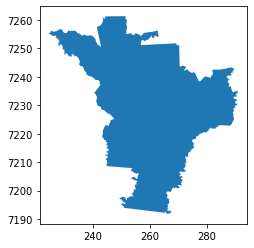

In [301]:
cascavel.plot()

In [302]:
cascavel.crs

<Projected CRS: PROJCS["unknown",GEOGCS["GCS_unknown",DATUM["D_Unk ...>
Name: unknown
Axis Info [cartesian]:
- [east]: Easting (kilometre)
- [north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: D_Unknown_based_on_GRS80_ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [303]:
geo_dados.crs

<Geographic 2D CRS: +proj=latlong +ellps=WGS84 +datum=WGS84 +no_defs + ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [304]:
cascavel = cascavel.to_crs(crs_zona22)

In [305]:
geo_dados = geo_dados.to_crs(crs_zona22)

In [306]:
cascavel.crs

<Bound CRS: +proj=utm +zone=22 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [307]:
geo_dados.crs

<Bound CRS: +proj=utm +zone=22 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [308]:
cascavel.to_file('processed\CASCAVEL-MUNIC.shp')
geo_dados.to_file('processed\DATASET.shp')

# Selecionando Pontos Dentro de uma Região

In [309]:
#cascavel = gpd.read_file('CASCAVEL-MUNIC.shp')
#geo_dados = gpd.read_file('DATASET.shp')

<AxesSubplot:>

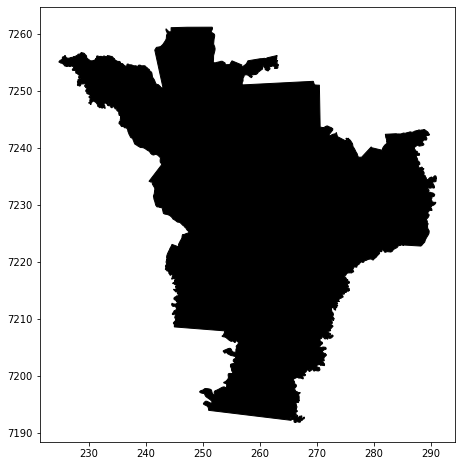

In [310]:
cascavel.plot(color='black', edgecolor='black', figsize=(15, 8))

<AxesSubplot:>

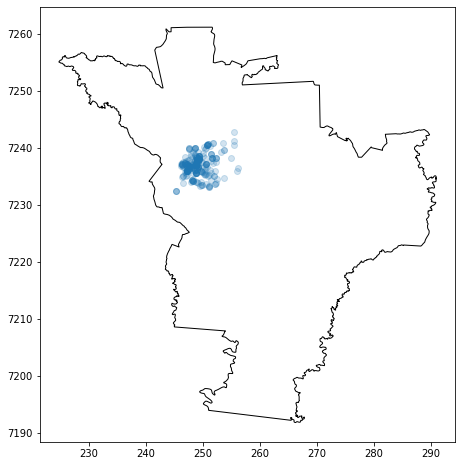

In [311]:
base = cascavel.plot(color='white', edgecolor='black', figsize=(15, 8))
geo_dados.plot(ax=base, figsize=(15, 8), alpha=0.2)

In [312]:
cascavel

ID CD_GEOCODM NM_MUNICIP  \
0  246    4104808   CASCAVEL   

                                            geometry  
0  POLYGON ((242.542 7252.096, 241.431 7257.188, ...

In [313]:
cascavel.iloc[0]

ID                                                          246
CD_GEOCODM                                              4104808
NM_MUNICIP                                             CASCAVEL
geometry      POLYGON ((242.5421232419079 7252.095830156244,...
Name: 0, dtype: object

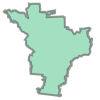

In [314]:
cascavel.iloc[0].geometry

In [315]:
geo_dados.iloc[0]

PEDIDO                                              101.0
DATA                                               01/mai
CLIENTE                                               NaN
ENDERECO                            RUA IRACI VIGANO, 281
BAIRRO                                       PARQUE VERDE
TOTAL_PROD                                           18.0
COMISSAO                                              0.0
FRETE                                                 0.0
OUTROS                                                0.0
DESCONTO                                              0.0
TOTAL                                                18.0
PAGO                                                  SIM
OBSERVACAO                                            NaN
LATITUDE                                        -24.94462
LONGITUDE                                       -53.49701
geometry      POINT (247.8628384560058 7238.866260868919)
Name: 1, dtype: object

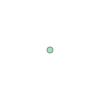

In [316]:
geo_dados.iloc[0].geometry

In [317]:
geo_dados.iloc[0].geometry.within(cascavel.iloc[0].geometry)

True

In [318]:
cascavel.iloc[0].geometry.contains(geo_dados.iloc[0].geometry)

True

In [319]:
geo_dados['geometry'].within(cascavel.iloc[0].geometry)

1      True
2      True
3      True
4      True
5      True
       ... 
366    True
367    True
368    True
369    True
370    True
Length: 326, dtype: bool

In [320]:
geo_dados.head()

PEDIDO    DATA           CLIENTE                ENDERECO  \
1   101.0  01/mai               NaN   RUA IRACI VIGANO, 281   
2   102.0  01/mai               NaN     TREZE DE MAIO, 1672   
3   103.0  04/mai       JOSI POMINI  RUA VASCO DA GAMA, 396   
4   104.0  04/mai               NaN    RUA DOS PARDAIS, 580   
5   105.0  04/mai  JEFERSON SARRETA      RUA CURITIBA, 1540   

                  BAIRRO  TOTAL_PROD  COMISSAO  FRETE  OUTROS  DESCONTO  \
1           PARQUE VERDE        18.0       0.0    0.0     0.0       0.0   
2                    NaN        18.0       0.0    0.0     0.0       0.0   
3  PIONEIROS CATARINENSE        30.0       0.0    0.0     0.0       0.0   
4               FLORESTA        10.5       0.0    3.5     0.0       0.0   
5                   NEVA        37.5       0.0    0.0     0.0       0.0   

   TOTAL PAGO OBSERVACAO  LATITUDE  LONGITUDE                  geometry  
1   18.0  SIM        NaN -24.94462  -53.49701  POINT (247.863 7238.866)  
2   18.0  SIM        NaN -24.94257  -53.44476  POINT (253.137 7239.189)  
3   30.0  SIM        NaN -24.97480  -53.48962  POINT (248.671 7235.536)  
4   14.0  SIM        NaN -24.91047  -53.42232  POINT (255.340 7242.786)  
5   37.5  SIM        NaN -24.96158  -53.47200  POINT (250.423 7237.033)

In [321]:
amostra = geo_dados.iloc[:12]
amostra

PEDIDO    DATA           CLIENTE                           ENDERECO  \
1    101.0  01/mai               NaN              RUA IRACI VIGANO, 281   
2    102.0  01/mai               NaN                TREZE DE MAIO, 1672   
3    103.0  04/mai       JOSI POMINI             RUA VASCO DA GAMA, 396   
4    104.0  04/mai               NaN               RUA DOS PARDAIS, 580   
5    105.0  04/mai  JEFERSON SARRETA                 RUA CURITIBA, 1540   
6    106.0  08/mai             COMIL                      BR 277, KM522   
8    108.0  11/mai      JOSI - SALÃO                   RUA PARANÁ, 5349   
10   110.0  11/mai          TAIS 202  RUA VALDEMAR BONN, 273 - APTO 202   
12   112.0  11/mai             DEISI  RUA VALDEMAR BONN, 273 - APTO 103   
13   113.0  12/mai            CAIQUE                RUA RIO DA PAZ, 232   
15   115.0  13/mai           ADELINE                      BR 277, KM522   
19   119.0  18/mai               NaN                    RUA PIO XII, 79   

                   BAIRRO  TOTAL_PROD  COMISSAO  FRETE  OUTROS  DESCONTO  \
1            PARQUE VERDE       18.00       0.0    0.0    0.00       0.0   
2                     NaN       18.00       0.0    0.0    0.00       0.0   
3   PIONEIROS CATARINENSE       30.00       0.0    0.0    0.00       0.0   
4                FLORESTA       10.50       0.0    3.5    0.00       0.0   
5                    NEVA       37.50       0.0    0.0    0.00       0.0   
6       PARQUE INDUSTRIAL      132.00       0.0    0.0    0.00       0.0   
8                TROPICAL        6.00       0.0    0.0    0.00       0.0   
10              COQUEIRAL       12.00       0.0    0.0    0.00       0.0   
12              COQUEIRAL       24.00       0.0    0.0    0.00       0.0   
13          UNIVERSITÁRIO       15.00       0.0    0.0    0.00       0.0   
15      PARQUE INDUSTRIAL       43.65       0.0    0.0    1.35       0.0   
19                   NEVA        6.00       0.0    2.3    0.00       0.0   

    TOTAL PAGO OBSERVACAO  LATITUDE  LONGITUDE                  geometry  
1    18.0  SIM        NaN -24.94462  -53.49701  POINT (247.863 7238.866)  
2    18.0  SIM        NaN -24.94257  -53.44476  POINT (253.137 7239.189)  
3    30.0  SIM        NaN -24.97480  -53.48962  POINT (248.671 7235.536)  
4    14.0  SIM        NaN -24.91047  -53.42232  POINT (255.340 7242.786)  
5    37.5  SIM        NaN -24.96158  -53.47200  POINT (250.423 7237.033)  
6   132.0  SIM        NaN -25.00321  -53.52493  POINT (245.163 7232.322)  
8     6.0  SIM        NaN -24.95325  -53.48251  POINT (249.345 7237.937)  
10   12.0  SIM        NaN -24.95473  -53.48710  POINT (248.884 7237.764)  
12   24.0  SIM        NaN -24.95473  -53.48710  POINT (248.884 7237.764)  
13   15.0  SIM        NaN -24.98536  -53.45267  POINT (252.423 7234.434)  
15   45.0  SIM        NaN -25.00321  -53.52493  POINT (245.163 7232.322)  
19    8.3  SIM        NaN -24.97737  -53.47090  POINT (250.566 7235.286)

<AxesSubplot:>

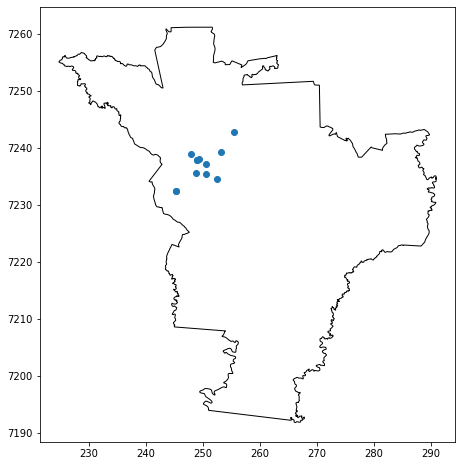

In [322]:
base = cascavel.plot(color='white', edgecolor='black', figsize=(15, 8))
amostra.plot(ax=base, figsize=(15, 8), alpha=1)

In [323]:
geo_dados.shape[0]

326

In [324]:
geo_dados = geo_dados[geo_dados['geometry'].within(cascavel.iloc[0].geometry)]

In [325]:
geo_dados.shape[0]

326

<AxesSubplot:>

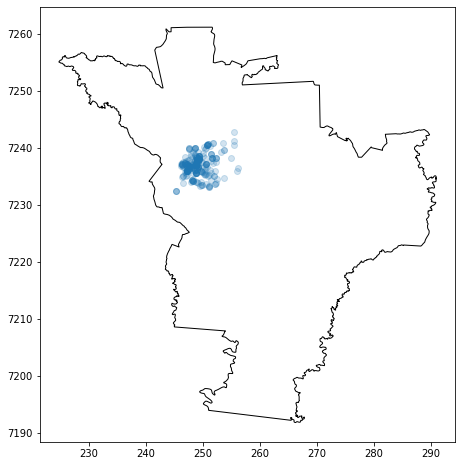

In [326]:
base = cascavel.plot(color='white', edgecolor='black', figsize=(15, 8))
geo_dados.plot(ax=base, figsize=(15, 8), alpha=0.2)

In [327]:
geo_dados.to_file('processed\DATASET.shp')

# Setores Censitários

ftp://geoftp.ibge.gov.br/recortes_para_fins_estatisticos/malha_de_setores_censitarios/censo_2010/base_de_faces_de_logradouros_versao_2019/PR/

https://cidades.ibge.gov.br/brasil/panorama

In [328]:
    #código de cascavel - ibge : 4104808

In [337]:
setor = gpd.read_file('processed\CASCAVEL-SETOR.shp')

In [338]:
setor.shape

(427, 14)

In [340]:
setor.head()

ID1       CD_GEOCODI    TIPO    CD_GEOCODB    NM_BAIRRO CD_GEOCODD  \
0  201006  410480805000110  URBANO  410480805022  BRASMADEIRA  410480805   
1  201007  410480805000111  URBANO  410480805022  BRASMADEIRA  410480805   
2  201008  410480805000112  URBANO  410480805022  BRASMADEIRA  410480805   
3  201009  410480805000113  URBANO  410480805023   INTERLAGOS  410480805   
4  201010  410480805000114  URBANO  410480805023   INTERLAGOS  410480805   

  NM_DISTRIT CD_GEOCODS NM_SUBDIST CD_GEOCODM NM_MUNICIP           NM_MESO  \
0   CASCAVEL  410480805   CASCAVEL    4104808   CASCAVEL  OESTE PARANAENSE   
1   CASCAVEL  410480805   CASCAVEL    4104808   CASCAVEL  OESTE PARANAENSE   
2   CASCAVEL  410480805   CASCAVEL    4104808   CASCAVEL  OESTE PARANAENSE   
3   CASCAVEL  410480805   CASCAVEL    4104808   CASCAVEL  OESTE PARANAENSE   
4   CASCAVEL  410480805   CASCAVEL    4104808   CASCAVEL  OESTE PARANAENSE   

   NM_MICRO                                           geometry  
0  CASCAVEL  POLYGON ((253.366 7240.934, 253.390 7240.632, ...  
1  CASCAVEL  POLYGON ((252.928 7241.597, 252.924 7241.604, ...  
2  CASCAVEL  POLYGON ((253.673 7241.524, 253.687 7241.547, ...  
3  CASCAVEL  POLYGON ((254.044 7241.427, 254.103 7241.482, ...  
4  CASCAVEL  POLYGON ((254.174 7241.549, 254.164 7241.540, ...

In [341]:
cidade_cascavel = setor[setor['NM_DISTRIT'] == 'CASCAVEL']

In [342]:
cidade_cascavel.head()

ID1       CD_GEOCODI    TIPO    CD_GEOCODB    NM_BAIRRO CD_GEOCODD  \
0  201006  410480805000110  URBANO  410480805022  BRASMADEIRA  410480805   
1  201007  410480805000111  URBANO  410480805022  BRASMADEIRA  410480805   
2  201008  410480805000112  URBANO  410480805022  BRASMADEIRA  410480805   
3  201009  410480805000113  URBANO  410480805023   INTERLAGOS  410480805   
4  201010  410480805000114  URBANO  410480805023   INTERLAGOS  410480805   

  NM_DISTRIT CD_GEOCODS NM_SUBDIST CD_GEOCODM NM_MUNICIP           NM_MESO  \
0   CASCAVEL  410480805   CASCAVEL    4104808   CASCAVEL  OESTE PARANAENSE   
1   CASCAVEL  410480805   CASCAVEL    4104808   CASCAVEL  OESTE PARANAENSE   
2   CASCAVEL  410480805   CASCAVEL    4104808   CASCAVEL  OESTE PARANAENSE   
3   CASCAVEL  410480805   CASCAVEL    4104808   CASCAVEL  OESTE PARANAENSE   
4   CASCAVEL  410480805   CASCAVEL    4104808   CASCAVEL  OESTE PARANAENSE   

   NM_MICRO                                           geometry  
0  CASCAVEL  POLYGON ((253.366 7240.934, 253.390 7240.632, ...  
1  CASCAVEL  POLYGON ((252.928 7241.597, 252.924 7241.604, ...  
2  CASCAVEL  POLYGON ((253.673 7241.524, 253.687 7241.547, ...  
3  CASCAVEL  POLYGON ((254.044 7241.427, 254.103 7241.482, ...  
4  CASCAVEL  POLYGON ((254.174 7241.549, 254.164 7241.540, ...

In [343]:
cidade_cascavel = cidade_cascavel[cidade_cascavel['TIPO'] == 'URBANO']


In [344]:
cidade_cascavel

ID1       CD_GEOCODI    TIPO    CD_GEOCODB    NM_BAIRRO CD_GEOCODD  \
0    201006  410480805000110  URBANO  410480805022  BRASMADEIRA  410480805   
1    201007  410480805000111  URBANO  410480805022  BRASMADEIRA  410480805   
2    201008  410480805000112  URBANO  410480805022  BRASMADEIRA  410480805   
3    201009  410480805000113  URBANO  410480805023   INTERLAGOS  410480805   
4    201010  410480805000114  URBANO  410480805023   INTERLAGOS  410480805   
..      ...              ...     ...           ...          ...        ...   
422  202443  410480805000355  URBANO  410480805027      MORUMBI  410480805   
423  202444  410480805000356  URBANO  410480805027      MORUMBI  410480805   
424  202445  410480805000357  URBANO  410480805028    CATARATAS  410480805   
425  202446  410480805000358  URBANO  410480805028    CATARATAS  410480805   
426  202447  410480805000359  URBANO  410480805028    CATARATAS  410480805   

    NM_DISTRIT CD_GEOCODS NM_SUBDIST CD_GEOCODM NM_MUNICIP           NM_MESO  \
0     CASCAVEL  410480805   CASCAVEL    4104808   CASCAVEL  OESTE PARANAENSE   
1     CASCAVEL  410480805   CASCAVEL    4104808   CASCAVEL  OESTE PARANAENSE   
2     CASCAVEL  410480805   CASCAVEL    4104808   CASCAVEL  OESTE PARANAENSE   
3     CASCAVEL  410480805   CASCAVEL    4104808   CASCAVEL  OESTE PARANAENSE   
4     CASCAVEL  410480805   CASCAVEL    4104808   CASCAVEL  OESTE PARANAENSE   
..         ...        ...        ...        ...        ...               ...   
422   CASCAVEL  410480805   CASCAVEL    4104808   CASCAVEL  OESTE PARANAENSE   
423   CASCAVEL  410480805   CASCAVEL    4104808   CASCAVEL  OESTE PARANAENSE   
424   CASCAVEL  410480805   CASCAVEL    4104808   CASCAVEL  OESTE PARANAENSE   
425   CASCAVEL  410480805   CASCAVEL    4104808   CASCAVEL  OESTE PARANAENSE   
426   CASCAVEL  410480805   CASCAVEL    4104808   CASCAVEL  OESTE PARANAENSE   

     NM_MICRO                                           geometry  
0    CASCAVEL  POLYGON ((253.366 7240.934, 253.390 7240.632, ...  
1    CASCAVEL  POLYGON ((252.928 7241.597, 252.924 7241.604, ...  
2    CASCAVEL  POLYGON ((253.673 7241.524, 253.687 7241.547, ...  
3    CASCAVEL  POLYGON ((254.044 7241.427, 254.103 7241.482, ...  
4    CASCAVEL  POLYGON ((254.174 7241.549, 254.164 7241.540, ...  
..        ...                                                ...  
422  CASCAVEL  POLYGON ((256.885 7239.852, 256.879 7239.820, ...  
423  CASCAVEL  POLYGON ((257.301 7239.181, 257.306 7239.183, ...  
424  CASCAVEL  POLYGON ((256.505 7238.511, 256.636 7238.359, ...  
425  CASCAVEL  POLYGON ((257.044 7238.612, 257.046 7238.625, ...  
426  CASCAVEL  POLYGON ((257.578 7237.494, 257.580 7237.479, ...  

[427 rows x 14 columns]

In [345]:
cidade_cascavel.shape

(427, 14)

In [346]:
cidade_cascavel = cidade_cascavel.to_crs(crs_zona22)

<AxesSubplot:>

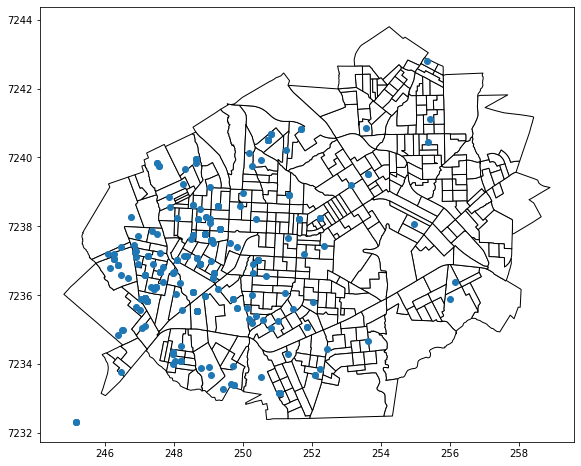

In [347]:
base = cidade_cascavel.plot(color='white', edgecolor='black', figsize=(15, 8))
geo_dados.plot(ax=base, figsize=(15, 8), alpha=1)

In [348]:
bairro_coqueiral = cidade_cascavel[cidade_cascavel['NM_BAIRRO'] == 'COQUEIRAL']

<AxesSubplot:>

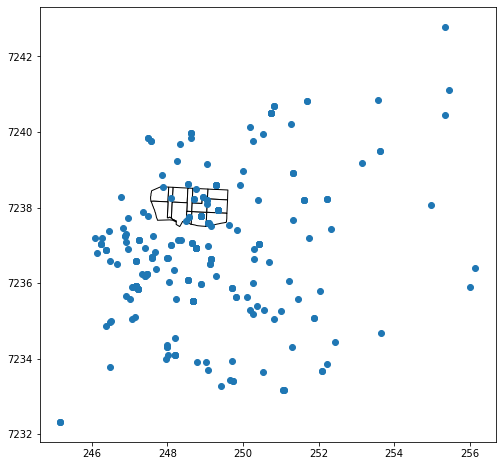

In [349]:
base = bairro_coqueiral.plot(color='white', edgecolor='black', figsize=(15, 8))
geo_dados.plot(ax=base, figsize=(15, 8), alpha=1)

# Dados Censitários

ftp://ftp.ibge.gov.br/Censos/Censo_Demografico_2010/Resultados_do_Universo/Agregados_por_Setores_Censitarios/

In [350]:
censo = pd.read_excel('external\Basico_PR.xls')

In [351]:
censo.head()

Cod_setor  Cod_Grandes Regiões Nome_Grande_Regiao Cod_UF Nome_da_UF   \
0  410010305000001                    4         Região Sul     PR      Paraná   
1  410010305000002                    4         Região Sul     PR      Paraná   
2  410010305000003                    4         Região Sul     PR      Paraná   
3  410010305000004                    4         Região Sul     PR      Paraná   
4  410010305000005                    4         Região Sul     PR      Paraná   

   Cod_meso               Nome_da_meso  Cod_micro      Nome_da_micro  Cod_RM  \
0      4104  Norte Pioneiro Paranaense      41015  Cornélio Procópio       0   
1      4104  Norte Pioneiro Paranaense      41015  Cornélio Procópio       0   
2      4104  Norte Pioneiro Paranaense      41015  Cornélio Procópio       0   
3      4104  Norte Pioneiro Paranaense      41015  Cornélio Procópio       0   
4      4104  Norte Pioneiro Paranaense      41015  Cornélio Procópio       0   

   ...  V003  V004     V005        V006     V007        V008    V009  \
0  ...  2.83  1.85  1039.68  3931596.86  1087.11  4059827.51  719.46   
1  ...  2.92  1.78  1207.89  1813457.79  1236.55  1821073.16  781.19   
2  ...  3.09  2.39   639.27  2169297.29   823.40  2644036.69  419.55   
3  ...  3.10  2.19   603.05   247235.24   657.46   233718.39  404.48   
4  ...  3.19  1.82   750.98   274029.30   777.72   262956.98  489.13   

         V010     V011        V012  
0  1885006.05   892.37  2184241.66  
1  1393035.45  1112.13  1615532.38  
2  1305734.95   688.48  1958546.46  
3   195659.39   573.14   180553.07  
4   230708.13   634.51   207001.24  

[5 rows x 33 columns]

In [352]:
censo.dtypes

Cod_setor                int64
Cod_Grandes Regiões      int64
Nome_Grande_Regiao      object
Cod_UF                  object
Nome_da_UF              object
Cod_meso                 int64
Nome_da_meso            object
Cod_micro                int64
Nome_da_micro           object
Cod_RM                   int64
Nome_da_RM              object
Cod_municipio            int64
Nome_do_municipio       object
Cod_distrito             int64
Nome_do_distrito        object
Cod_subdistrito          int64
Nome_do_subdistrito     object
Cod_bairro               int64
Nome_do_bairro          object
Situacao_setor           int64
Tipo_setor               int64
V001                   float64
V002                   float64
V003                   float64
V004                   float64
V005                   float64
V006                   float64
V007                   float64
V008                   float64
V009                   float64
V010                   float64
V011                   float64
V012    

In [353]:
setor.dtypes

ID1              int64
CD_GEOCODI      object
TIPO            object
CD_GEOCODB      object
NM_BAIRRO       object
CD_GEOCODD      object
NM_DISTRIT      object
CD_GEOCODS      object
NM_SUBDIST      object
CD_GEOCODM      object
NM_MUNICIP      object
NM_MESO         object
NM_MICRO        object
geometry      geometry
dtype: object

In [354]:
censo['Cod_setor'] = censo['Cod_setor'].astype(str)

In [355]:
censo.dtypes

Cod_setor               object
Cod_Grandes Regiões      int64
Nome_Grande_Regiao      object
Cod_UF                  object
Nome_da_UF              object
Cod_meso                 int64
Nome_da_meso            object
Cod_micro                int64
Nome_da_micro           object
Cod_RM                   int64
Nome_da_RM              object
Cod_municipio            int64
Nome_do_municipio       object
Cod_distrito             int64
Nome_do_distrito        object
Cod_subdistrito          int64
Nome_do_subdistrito     object
Cod_bairro               int64
Nome_do_bairro          object
Situacao_setor           int64
Tipo_setor               int64
V001                   float64
V002                   float64
V003                   float64
V004                   float64
V005                   float64
V006                   float64
V007                   float64
V008                   float64
V009                   float64
V010                   float64
V011                   float64
V012    

In [356]:
print(type(censo))
print(type(setor))

<class 'pandas.core.frame.DataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>


In [357]:
setor.shape

(427, 14)

In [358]:
setor = pd.merge(setor, censo, left_on='CD_GEOCODI', right_on='Cod_setor', how='left')

In [359]:
setor.shape

(427, 47)

In [360]:
setor.head()

ID1       CD_GEOCODI    TIPO    CD_GEOCODB    NM_BAIRRO CD_GEOCODD  \
0  201006  410480805000110  URBANO  410480805022  BRASMADEIRA  410480805   
1  201007  410480805000111  URBANO  410480805022  BRASMADEIRA  410480805   
2  201008  410480805000112  URBANO  410480805022  BRASMADEIRA  410480805   
3  201009  410480805000113  URBANO  410480805023   INTERLAGOS  410480805   
4  201010  410480805000114  URBANO  410480805023   INTERLAGOS  410480805   

  NM_DISTRIT CD_GEOCODS NM_SUBDIST CD_GEOCODM  ...  V003  V004     V005  \
0   CASCAVEL  410480805   CASCAVEL    4104808  ...  3.19  2.34  1100.12   
1   CASCAVEL  410480805   CASCAVEL    4104808  ...  3.87  2.90   401.01   
2   CASCAVEL  410480805   CASCAVEL    4104808  ...  3.25  2.04   957.49   
3   CASCAVEL  410480805   CASCAVEL    4104808  ...  3.58  2.68   712.32   
4   CASCAVEL  410480805   CASCAVEL    4104808  ...  3.47  2.33   803.57   

         V006     V007        V008    V009       V010    V011       V012  
0  1052959.87  1126.47  1048470.74  691.25  687218.31  932.48  702140.48  
1   153624.32   618.96   101938.00  341.72  186840.45  630.59  162570.95  
2   785136.70  1043.73   765783.12  604.16  494337.87  867.09  481469.58  
3   158864.36   741.20   143798.54  415.38  241629.08  689.74  211881.11  
4   265198.69   854.17   238581.04  499.42  231296.24  702.95  182403.12  

[5 rows x 47 columns]

In [361]:
setor.columns

Index(['ID1', 'CD_GEOCODI', 'TIPO', 'CD_GEOCODB', 'NM_BAIRRO', 'CD_GEOCODD',
       'NM_DISTRIT', 'CD_GEOCODS', 'NM_SUBDIST', 'CD_GEOCODM', 'NM_MUNICIP',
       'NM_MESO', 'NM_MICRO', 'geometry', 'Cod_setor', 'Cod_Grandes Regiões',
       'Nome_Grande_Regiao', 'Cod_UF', 'Nome_da_UF ', 'Cod_meso',
       'Nome_da_meso', 'Cod_micro', 'Nome_da_micro', 'Cod_RM', 'Nome_da_RM',
       'Cod_municipio', 'Nome_do_municipio', 'Cod_distrito',
       'Nome_do_distrito', 'Cod_subdistrito', 'Nome_do_subdistrito',
       'Cod_bairro', 'Nome_do_bairro', 'Situacao_setor', 'Tipo_setor', 'V001',
       'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010',
       'V011', 'V012'],
      dtype='object')

In [362]:
type(setor)

geopandas.geodataframe.GeoDataFrame

In [363]:
setor.crs

<Projected CRS: PROJCS["unknown",GEOGCS["GCS_unknown",DATUM["D_Unk ...>
Name: unknown
Axis Info [cartesian]:
- [east]: Easting (kilometre)
- [north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: D_Unknown_based_on_GRS80_ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [364]:
setor.to_file('processed\CASCAVEL-SETOR.shp')

<ipython-input-364-1a0869a4871e>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  setor.to_file('processed\CASCAVEL-SETOR.shp')


# Juntando os Dados Censitários ao Dataset

In [365]:
#geo_dados = gpd.read_file('DATASET.shp')
#setor = gpd.read_file('CASCAVEL-SETOR.shp')

In [366]:
geo_dados

PEDIDO    DATA           CLIENTE                ENDERECO  \
1     101.0  01/mai               NaN   RUA IRACI VIGANO, 281   
2     102.0  01/mai               NaN     TREZE DE MAIO, 1672   
3     103.0  04/mai       JOSI POMINI  RUA VASCO DA GAMA, 396   
4     104.0  04/mai               NaN    RUA DOS PARDAIS, 580   
5     105.0  04/mai  JEFERSON SARRETA      RUA CURITIBA, 1540   
..      ...     ...               ...                     ...   
366   469.0  31/mar            CLEUZA   RUA CAMPOS SALES, 387   
367   470.0  31/mar               NaN  RUA DAS AZALÉIAS, 1152   
368   471.0  31/mar               NaN        RUA GRAMADO, 355   
369   472.0  31/mar               NaN       RUA APINAJÉS, 363   
370   473.0  31/mar               NaN               A RETIRAR   

                    BAIRRO  TOTAL_PROD  COMISSAO  FRETE  OUTROS  DESCONTO  \
1             PARQUE VERDE        18.0       0.0    0.0     0.0       0.0   
2                      NaN        18.0       0.0    0.0     0.0       0.0   
3    PIONEIROS CATARINENSE        30.0       0.0    0.0     0.0       0.0   
4                 FLORESTA        10.5       0.0    3.5     0.0       0.0   
5                     NEVA        37.5       0.0    0.0     0.0       0.0   
..                     ...         ...       ...    ...     ...       ...   
366       PARQUE SÃO PAULO        35.0       0.0    0.0     0.0       0.0   
367                GUARUJÁ        14.0       0.0    0.0     0.0       0.0   
368              COQUEIRAL        13.3       0.0    0.0     0.0       0.3   
369             SANTA CRUZ        19.5       0.0    0.0     0.5       0.0   
370                    NaN        24.0       0.0    0.0     0.0       0.0   

     TOTAL PAGO OBSERVACAO  LATITUDE  LONGITUDE                  geometry  
1     18.0  SIM        NaN -24.94462  -53.49701  POINT (247.863 7238.866)  
2     18.0  SIM        NaN -24.94257  -53.44476  POINT (253.137 7239.189)  
3     30.0  SIM        NaN -24.97480  -53.48962  POINT (248.671 7235.536)  
4     14.0  SIM        NaN -24.91047  -53.42232  POINT (255.340 7242.786)  
5     37.5  SIM        NaN -24.96158  -53.47200  POINT (250.423 7237.033)  
..     ...  ...        ...       ...        ...                       ...  
366   35.0  NaN        NaN -24.97946  -53.46850  POINT (250.813 7235.059)  
367   14.0  NaN        NaN -24.98765  -53.49451  POINT (248.203 7234.103)  
368   13.0  NaN        NaN -24.95632  -53.48533  POINT (249.066 7237.592)  
369   20.0  NaN        NaN -24.95926  -53.49985  POINT (247.606 7237.239)  
370   24.0  NaN        NaN -24.95473  -53.48710  POINT (248.884 7237.764)  

[326 rows x 16 columns]

In [367]:
setor = setor.to_crs(crs_zona22)
geo_dados = geo_dados.to_crs(crs_zona22)

<AxesSubplot:>

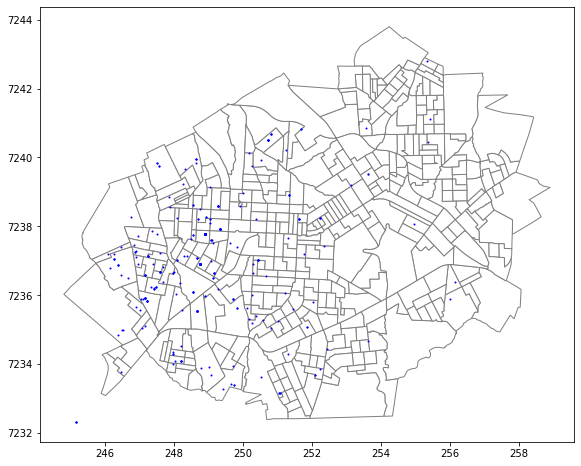

In [368]:
base = setor.plot(color='white', edgecolor='grey', figsize=(15,8))
geo_dados.plot(ax = base, color='blue', markersize=1)

In [369]:
setor

ID1       CD_GEOCODI    TIPO    CD_GEOCODB    NM_BAIRRO CD_GEOCODD  \
0    201006  410480805000110  URBANO  410480805022  BRASMADEIRA  410480805   
1    201007  410480805000111  URBANO  410480805022  BRASMADEIRA  410480805   
2    201008  410480805000112  URBANO  410480805022  BRASMADEIRA  410480805   
3    201009  410480805000113  URBANO  410480805023   INTERLAGOS  410480805   
4    201010  410480805000114  URBANO  410480805023   INTERLAGOS  410480805   
..      ...              ...     ...           ...          ...        ...   
422  202443  410480805000355  URBANO  410480805027      MORUMBI  410480805   
423  202444  410480805000356  URBANO  410480805027      MORUMBI  410480805   
424  202445  410480805000357  URBANO  410480805028    CATARATAS  410480805   
425  202446  410480805000358  URBANO  410480805028    CATARATAS  410480805   
426  202447  410480805000359  URBANO  410480805028    CATARATAS  410480805   

    NM_DISTRIT CD_GEOCODS NM_SUBDIST CD_GEOCODM  ...  V003  V004     V005  \
0     CASCAVEL  410480805   CASCAVEL    4104808  ...  3.19  2.34  1100.12   
1     CASCAVEL  410480805   CASCAVEL    4104808  ...  3.87  2.90   401.01   
2     CASCAVEL  410480805   CASCAVEL    4104808  ...  3.25  2.04   957.49   
3     CASCAVEL  410480805   CASCAVEL    4104808  ...  3.58  2.68   712.32   
4     CASCAVEL  410480805   CASCAVEL    4104808  ...  3.47  2.33   803.57   
..         ...        ...        ...        ...  ...   ...   ...      ...   
422   CASCAVEL  410480805   CASCAVEL    4104808  ...  3.54  3.04   999.17   
423   CASCAVEL  410480805   CASCAVEL    4104808  ...  3.31  2.37   789.50   
424   CASCAVEL  410480805   CASCAVEL    4104808  ...  3.36  2.09   722.34   
425   CASCAVEL  410480805   CASCAVEL    4104808  ...  4.03  3.63   425.68   
426   CASCAVEL  410480805   CASCAVEL    4104808  ...  3.36  1.70   989.69   

           V006     V007        V008    V009        V010    V011        V012  
0    1052959.87  1126.47  1048470.74  691.25   687218.31  932.48   702140.48  
1     153624.32   618.96   101938.00  341.72   186840.45  630.59   162570.95  
2     785136.70  1043.73   765783.12  604.16   494337.87  867.09   481469.58  
3     158864.36   741.20   143798.54  415.38   241629.08  689.74   211881.11  
4     265198.69   854.17   238581.04  499.42   231296.24  702.95   182403.12  
..          ...      ...         ...     ...         ...     ...         ...  
422  2236075.63  1048.08  2294682.00  563.75  1155148.47  881.96  1527830.07  
423   161939.61   805.19   152464.53  454.63   199725.27  729.48   119671.27  
424   292420.23   822.36   250444.34  500.49   269602.98  755.14   214341.49  
425   298425.98   747.41   283340.74  367.38   328503.97  712.68   391447.50  
426  2104612.97  1210.60  2308779.79  640.68   965648.85  977.10  1144686.06  

[427 rows x 47 columns]

In [370]:
geo_dados.shape

(326, 16)

In [371]:
setor.shape

(427, 47)

## Unificando Dataset com Dados IBGE

In [372]:
geo_dados = gpd.sjoin(geo_dados, setor, how='left', op='within')

In [373]:
geo_dados.head()

PEDIDO    DATA           CLIENTE                ENDERECO  \
1   101.0  01/mai               NaN   RUA IRACI VIGANO, 281   
2   102.0  01/mai               NaN     TREZE DE MAIO, 1672   
3   103.0  04/mai       JOSI POMINI  RUA VASCO DA GAMA, 396   
4   104.0  04/mai               NaN    RUA DOS PARDAIS, 580   
5   105.0  04/mai  JEFERSON SARRETA      RUA CURITIBA, 1540   

                  BAIRRO  TOTAL_PROD  COMISSAO  FRETE  OUTROS  DESCONTO  ...  \
1           PARQUE VERDE        18.0       0.0    0.0     0.0       0.0  ...   
2                    NaN        18.0       0.0    0.0     0.0       0.0  ...   
3  PIONEIROS CATARINENSE        30.0       0.0    0.0     0.0       0.0  ...   
4               FLORESTA        10.5       0.0    3.5     0.0       0.0  ...   
5                   NEVA        37.5       0.0    0.0     0.0       0.0  ...   

   V003  V004     V005         V006     V007         V008     V009  \
1  2.75  1.34  2903.67   8890467.87  2959.78   8896220.40  1815.83   
2  3.01  1.41  4240.29  19373979.69  4469.50  19396914.73  2286.30   
3  2.97  1.82  1285.59   1192038.71  1364.56   1157381.10   888.38   
4  3.50  6.01   660.05    946797.58   940.93   1086899.77   645.65   
5  2.82  1.45  1742.48   6187401.53  2081.56   6688332.23  1549.75   

          V010     V011         V012  
1   6143490.37  2499.26   6749334.72  
2  16046811.99  3380.88  20039959.43  
3    968283.83  1179.65    942113.92  
4    576528.84   914.47    570721.91  
5   4932059.42  2012.20   5474502.35  

[5 rows x 63 columns]

In [374]:
geo_dados.shape

(326, 63)

In [375]:
geo_dados = geo_dados[~geo_dados.index.duplicated(keep='first')] # elimina os duplicados

In [376]:
geo_dados.shape

(326, 63)

In [377]:
geo_dados.head()

PEDIDO    DATA           CLIENTE                ENDERECO  \
1   101.0  01/mai               NaN   RUA IRACI VIGANO, 281   
2   102.0  01/mai               NaN     TREZE DE MAIO, 1672   
3   103.0  04/mai       JOSI POMINI  RUA VASCO DA GAMA, 396   
4   104.0  04/mai               NaN    RUA DOS PARDAIS, 580   
5   105.0  04/mai  JEFERSON SARRETA      RUA CURITIBA, 1540   

                  BAIRRO  TOTAL_PROD  COMISSAO  FRETE  OUTROS  DESCONTO  ...  \
1           PARQUE VERDE        18.0       0.0    0.0     0.0       0.0  ...   
2                    NaN        18.0       0.0    0.0     0.0       0.0  ...   
3  PIONEIROS CATARINENSE        30.0       0.0    0.0     0.0       0.0  ...   
4               FLORESTA        10.5       0.0    3.5     0.0       0.0  ...   
5                   NEVA        37.5       0.0    0.0     0.0       0.0  ...   

   V003  V004     V005         V006     V007         V008     V009  \
1  2.75  1.34  2903.67   8890467.87  2959.78   8896220.40  1815.83   
2  3.01  1.41  4240.29  19373979.69  4469.50  19396914.73  2286.30   
3  2.97  1.82  1285.59   1192038.71  1364.56   1157381.10   888.38   
4  3.50  6.01   660.05    946797.58   940.93   1086899.77   645.65   
5  2.82  1.45  1742.48   6187401.53  2081.56   6688332.23  1549.75   

          V010     V011         V012  
1   6143490.37  2499.26   6749334.72  
2  16046811.99  3380.88  20039959.43  
3    968283.83  1179.65    942113.92  
4    576528.84   914.47    570721.91  
5   4932059.42  2012.20   5474502.35  

[5 rows x 63 columns]

In [378]:
geo_dados.crs

<Bound CRS: +proj=utm +zone=22 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [379]:
geo_dados.columns

Index(['PEDIDO', 'DATA', 'CLIENTE', 'ENDERECO', 'BAIRRO', 'TOTAL_PROD',
       'COMISSAO', 'FRETE', 'OUTROS', 'DESCONTO', 'TOTAL', 'PAGO',
       'OBSERVACAO', 'LATITUDE', 'LONGITUDE', 'geometry', 'index_right', 'ID1',
       'CD_GEOCODI', 'TIPO', 'CD_GEOCODB', 'NM_BAIRRO', 'CD_GEOCODD',
       'NM_DISTRIT', 'CD_GEOCODS', 'NM_SUBDIST', 'CD_GEOCODM', 'NM_MUNICIP',
       'NM_MESO', 'NM_MICRO', 'Cod_setor', 'Cod_Grandes Regiões',
       'Nome_Grande_Regiao', 'Cod_UF', 'Nome_da_UF ', 'Cod_meso',
       'Nome_da_meso', 'Cod_micro', 'Nome_da_micro', 'Cod_RM', 'Nome_da_RM',
       'Cod_municipio', 'Nome_do_municipio', 'Cod_distrito',
       'Nome_do_distrito', 'Cod_subdistrito', 'Nome_do_subdistrito',
       'Cod_bairro', 'Nome_do_bairro', 'Situacao_setor', 'Tipo_setor', 'V001',
       'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010',
       'V011', 'V012'],
      dtype='object')

In [380]:
geo_dados.to_file('processed/DATASET.shp')

<ipython-input-380-b3caac644342>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  geo_dados.to_file('processed/DATASET.shp')


# Agregando Regiões Geográficas

## Unificando Setores

In [381]:
#setor = gpd.read_file('processed\CASCAVEL-SETOR.shp')

<AxesSubplot:>

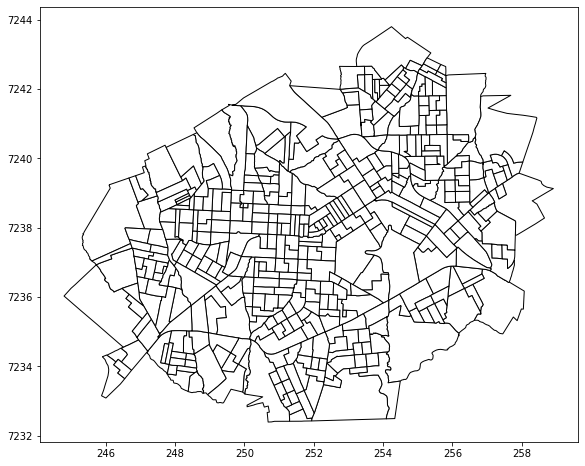

In [382]:
setor.plot(color='white', edgecolor='black', figsize=(15, 8))

In [383]:
setor.head()

ID1       CD_GEOCODI    TIPO    CD_GEOCODB    NM_BAIRRO CD_GEOCODD  \
0  201006  410480805000110  URBANO  410480805022  BRASMADEIRA  410480805   
1  201007  410480805000111  URBANO  410480805022  BRASMADEIRA  410480805   
2  201008  410480805000112  URBANO  410480805022  BRASMADEIRA  410480805   
3  201009  410480805000113  URBANO  410480805023   INTERLAGOS  410480805   
4  201010  410480805000114  URBANO  410480805023   INTERLAGOS  410480805   

  NM_DISTRIT CD_GEOCODS NM_SUBDIST CD_GEOCODM  ...  V003  V004     V005  \
0   CASCAVEL  410480805   CASCAVEL    4104808  ...  3.19  2.34  1100.12   
1   CASCAVEL  410480805   CASCAVEL    4104808  ...  3.87  2.90   401.01   
2   CASCAVEL  410480805   CASCAVEL    4104808  ...  3.25  2.04   957.49   
3   CASCAVEL  410480805   CASCAVEL    4104808  ...  3.58  2.68   712.32   
4   CASCAVEL  410480805   CASCAVEL    4104808  ...  3.47  2.33   803.57   

         V006     V007        V008    V009       V010    V011       V012  
0  1052959.87  1126.47  1048470.74  691.25  687218.31  932.48  702140.48  
1   153624.32   618.96   101938.00  341.72  186840.45  630.59  162570.95  
2   785136.70  1043.73   765783.12  604.16  494337.87  867.09  481469.58  
3   158864.36   741.20   143798.54  415.38  241629.08  689.74  211881.11  
4   265198.69   854.17   238581.04  499.42  231296.24  702.95  182403.12  

[5 rows x 47 columns]

In [384]:
#tentativa correção erro  setor.to_crs({'init': 'epsg:4326'})
#from pyproj import CRS
#CRS("epsg:4326")
#setor = CRS('EPSG:4326')

In [385]:
setor = setor.to_crs({'init': 'epsg:4326'})

C:\Users\lpmod\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [386]:
setor.shape

(427, 47)

In [387]:
setor.columns

Index(['ID1', 'CD_GEOCODI', 'TIPO', 'CD_GEOCODB', 'NM_BAIRRO', 'CD_GEOCODD',
       'NM_DISTRIT', 'CD_GEOCODS', 'NM_SUBDIST', 'CD_GEOCODM', 'NM_MUNICIP',
       'NM_MESO', 'NM_MICRO', 'geometry', 'Cod_setor', 'Cod_Grandes Regiões',
       'Nome_Grande_Regiao', 'Cod_UF', 'Nome_da_UF ', 'Cod_meso',
       'Nome_da_meso', 'Cod_micro', 'Nome_da_micro', 'Cod_RM', 'Nome_da_RM',
       'Cod_municipio', 'Nome_do_municipio', 'Cod_distrito',
       'Nome_do_distrito', 'Cod_subdistrito', 'Nome_do_subdistrito',
       'Cod_bairro', 'Nome_do_bairro', 'Situacao_setor', 'Tipo_setor', 'V001',
       'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010',
       'V011', 'V012'],
      dtype='object')

In [388]:
setor['Nome_da_micro'].head()

0    Cascavel
1    Cascavel
2    Cascavel
3    Cascavel
4    Cascavel
Name: Nome_da_micro, dtype: object

In [389]:
setor_cascavel = setor[setor['Nome_da_micro'] == 'Cascavel']

In [390]:
setor_cascavel.shape

(425, 47)

In [391]:
setor_cascavel.head()

ID1       CD_GEOCODI    TIPO    CD_GEOCODB    NM_BAIRRO CD_GEOCODD  \
0  201006  410480805000110  URBANO  410480805022  BRASMADEIRA  410480805   
1  201007  410480805000111  URBANO  410480805022  BRASMADEIRA  410480805   
2  201008  410480805000112  URBANO  410480805022  BRASMADEIRA  410480805   
3  201009  410480805000113  URBANO  410480805023   INTERLAGOS  410480805   
4  201010  410480805000114  URBANO  410480805023   INTERLAGOS  410480805   

  NM_DISTRIT CD_GEOCODS NM_SUBDIST CD_GEOCODM  ...  V003  V004     V005  \
0   CASCAVEL  410480805   CASCAVEL    4104808  ...  3.19  2.34  1100.12   
1   CASCAVEL  410480805   CASCAVEL    4104808  ...  3.87  2.90   401.01   
2   CASCAVEL  410480805   CASCAVEL    4104808  ...  3.25  2.04   957.49   
3   CASCAVEL  410480805   CASCAVEL    4104808  ...  3.58  2.68   712.32   
4   CASCAVEL  410480805   CASCAVEL    4104808  ...  3.47  2.33   803.57   

         V006     V007        V008    V009       V010    V011       V012  
0  1052959.87  1126.47  1048470.74  691.25  687218.31  932.48  702140.48  
1   153624.32   618.96   101938.00  341.72  186840.45  630.59  162570.95  
2   785136.70  1043.73   765783.12  604.16  494337.87  867.09  481469.58  
3   158864.36   741.20   143798.54  415.38  241629.08  689.74  211881.11  
4   265198.69   854.17   238581.04  499.42  231296.24  702.95  182403.12  

[5 rows x 47 columns]

In [392]:
#setor_cascavel.plot(color='white', edgecolor='black', figsize=(15, 8))

In [393]:
setor_cascavel = setor_cascavel[setor_cascavel['NM_DISTRIT'] == 'CASCAVEL']

In [394]:
setor_cascavel.shape

(425, 47)

In [395]:
setor_cascavel = setor_cascavel[setor_cascavel['TIPO'] == 'URBANO']

In [396]:
setor_cascavel.shape

(425, 47)

In [397]:
setor_cascavel

ID1       CD_GEOCODI    TIPO    CD_GEOCODB    NM_BAIRRO CD_GEOCODD  \
0    201006  410480805000110  URBANO  410480805022  BRASMADEIRA  410480805   
1    201007  410480805000111  URBANO  410480805022  BRASMADEIRA  410480805   
2    201008  410480805000112  URBANO  410480805022  BRASMADEIRA  410480805   
3    201009  410480805000113  URBANO  410480805023   INTERLAGOS  410480805   
4    201010  410480805000114  URBANO  410480805023   INTERLAGOS  410480805   
..      ...              ...     ...           ...          ...        ...   
422  202443  410480805000355  URBANO  410480805027      MORUMBI  410480805   
423  202444  410480805000356  URBANO  410480805027      MORUMBI  410480805   
424  202445  410480805000357  URBANO  410480805028    CATARATAS  410480805   
425  202446  410480805000358  URBANO  410480805028    CATARATAS  410480805   
426  202447  410480805000359  URBANO  410480805028    CATARATAS  410480805   

    NM_DISTRIT CD_GEOCODS NM_SUBDIST CD_GEOCODM  ...  V003  V004     V005  \
0     CASCAVEL  410480805   CASCAVEL    4104808  ...  3.19  2.34  1100.12   
1     CASCAVEL  410480805   CASCAVEL    4104808  ...  3.87  2.90   401.01   
2     CASCAVEL  410480805   CASCAVEL    4104808  ...  3.25  2.04   957.49   
3     CASCAVEL  410480805   CASCAVEL    4104808  ...  3.58  2.68   712.32   
4     CASCAVEL  410480805   CASCAVEL    4104808  ...  3.47  2.33   803.57   
..         ...        ...        ...        ...  ...   ...   ...      ...   
422   CASCAVEL  410480805   CASCAVEL    4104808  ...  3.54  3.04   999.17   
423   CASCAVEL  410480805   CASCAVEL    4104808  ...  3.31  2.37   789.50   
424   CASCAVEL  410480805   CASCAVEL    4104808  ...  3.36  2.09   722.34   
425   CASCAVEL  410480805   CASCAVEL    4104808  ...  4.03  3.63   425.68   
426   CASCAVEL  410480805   CASCAVEL    4104808  ...  3.36  1.70   989.69   

           V006     V007        V008    V009        V010    V011        V012  
0    1052959.87  1126.47  1048470.74  691.25   687218.31  932.48   702140.48  
1     153624.32   618.96   101938.00  341.72   186840.45  630.59   162570.95  
2     785136.70  1043.73   765783.12  604.16   494337.87  867.09   481469.58  
3     158864.36   741.20   143798.54  415.38   241629.08  689.74   211881.11  
4     265198.69   854.17   238581.04  499.42   231296.24  702.95   182403.12  
..          ...      ...         ...     ...         ...     ...         ...  
422  2236075.63  1048.08  2294682.00  563.75  1155148.47  881.96  1527830.07  
423   161939.61   805.19   152464.53  454.63   199725.27  729.48   119671.27  
424   292420.23   822.36   250444.34  500.49   269602.98  755.14   214341.49  
425   298425.98   747.41   283340.74  367.38   328503.97  712.68   391447.50  
426  2104612.97  1210.60  2308779.79  640.68   965648.85  977.10  1144686.06  

[425 rows x 47 columns]

In [398]:
setor_m = setor_cascavel[['NM_BAIRRO', 'geometry']]

In [399]:
bairro = setor_m.dissolve(by='NM_BAIRRO')

In [400]:
bairro

geometry
NM_BAIRRO                                                                
ALTO ALEGRE             POLYGON ((-53.49250 -24.97129, -53.49249 -24.9...
BRASMADEIRA             POLYGON ((-53.44124 -24.93010, -53.44075 -24.9...
BRASÍLIA                POLYGON ((-53.42641 -24.94455, -53.42666 -24.9...
CANADÁ                  POLYGON ((-53.46336 -24.93823, -53.46355 -24.9...
CANCELLI                POLYGON ((-53.46623 -24.94702, -53.46692 -24.9...
CASCAVEL VELHO          POLYGON ((-53.43638 -24.99042, -53.43598 -24.9...
CATARATAS               POLYGON ((-53.39922 -24.96402, -53.39960 -24.9...
CENTRO                  POLYGON ((-53.48007 -24.96468, -53.48083 -24.9...
COQUEIRAL               POLYGON ((-53.48237 -24.95655, -53.48304 -24.9...
COUNTRY                 POLYGON ((-53.45796 -24.94987, -53.45876 -24.9...
ESMERALDA               POLYGON ((-53.50188 -24.97809, -53.50181 -24.9...
FLORESTA                POLYGON ((-53.42039 -24.92948, -53.42065 -24.9...
GUARUJÁ                 POLYGON ((-53.49535 -24.99349, -53.49575 -24.9...
INTERLAGOS              POLYGON ((-53.43605 -24.92202, -53.43672 -24.9...
MARIA LUÍZA             POLYGON ((-53.45373 -24.97967, -53.45380 -24.9...
MORUMBI                 POLYGON ((-53.40620 -24.94467, -53.40634 -24.9...
NEVA                    POLYGON ((-53.47496 -24.97953, -53.47501 -24.9...
PACAEMBU                POLYGON ((-53.40926 -24.96455, -53.40942 -24.9...
PARQUE SÃO PAULO        POLYGON ((-53.45926 -24.98247, -53.45973 -24.9...
PARQUE VERDE            POLYGON ((-53.49154 -24.94265, -53.49101 -24.9...
PERIOLO                 POLYGON ((-53.41437 -24.95151, -53.41481 -24.9...
PIONEIROS CATARINENSES  POLYGON ((-53.49392 -24.97932, -53.49500 -24.9...
QUATORZE DE NOVEMBRO    POLYGON ((-53.48311 -24.98984, -53.48333 -24.9...
RECANTO TROPICAL        MULTIPOLYGON (((-53.49299 -24.94774, -53.49428...
REGIÃO DO LAGO          POLYGON ((-53.44110 -24.97038, -53.44174 -24.9...
SANTA CRUZ              POLYGON ((-53.50146 -24.95691, -53.50030 -24.9...
SANTA FELICIDADE        POLYGON ((-53.46410 -25.00267, -53.46414 -25.0...
SANTO INÁCIO            POLYGON ((-53.50305 -24.95349, -53.50272 -24.9...
SANTOS DUMONT           POLYGON ((-53.51591 -24.98530, -53.51556 -24.9...
SÃO CRISTÓVÃO           MULTIPOLYGON (((-53.42159 -24.95287, -53.42222...
UNIVERSITÁRIO           POLYGON ((-53.43799 -25.00319, -53.45783 -25.0...

<AxesSubplot:>

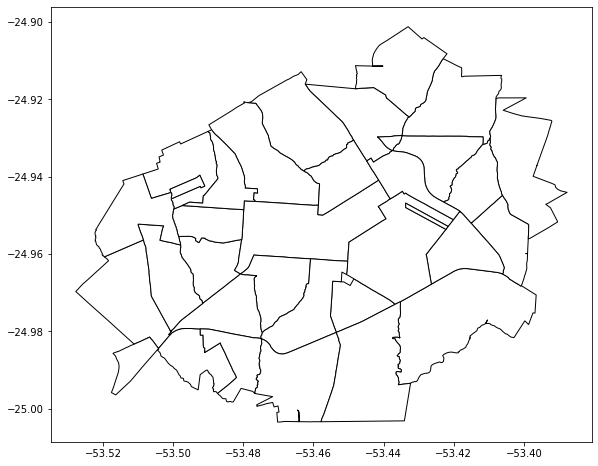

In [401]:
bairro.plot(color='white', edgecolor='black', figsize=(15, 8))

In [402]:
setor_cascavel.iloc[0]

ID1                                                               201006
CD_GEOCODI                                               410480805000110
TIPO                                                              URBANO
CD_GEOCODB                                                  410480805022
NM_BAIRRO                                                    BRASMADEIRA
CD_GEOCODD                                                     410480805
NM_DISTRIT                                                      CASCAVEL
CD_GEOCODS                                                     410480805
NM_SUBDIST                                                      CASCAVEL
CD_GEOCODM                                                       4104808
NM_MUNICIP                                                      CASCAVEL
NM_MESO                                                 OESTE PARANAENSE
NM_MICRO                                                        CASCAVEL
geometry               POLYGON ((-53.44217711520441

In [405]:
setor_m = setor_cascavel[['NM_BAIRRO', 'geometry', 'V002']]

In [406]:
bairro = setor_m.dissolve(by='NM_BAIRRO', aggfunc='sum')

In [407]:
bairro

geometry  \
NM_BAIRRO                                                                   
ALTO ALEGRE             POLYGON ((-53.49250 -24.97129, -53.49249 -24.9...   
BRASMADEIRA             POLYGON ((-53.44124 -24.93010, -53.44075 -24.9...   
BRASÍLIA                POLYGON ((-53.42641 -24.94455, -53.42666 -24.9...   
CANADÁ                  POLYGON ((-53.46336 -24.93823, -53.46355 -24.9...   
CANCELLI                POLYGON ((-53.46623 -24.94702, -53.46692 -24.9...   
CASCAVEL VELHO          POLYGON ((-53.43638 -24.99042, -53.43598 -24.9...   
CATARATAS               POLYGON ((-53.39922 -24.96402, -53.39960 -24.9...   
CENTRO                  POLYGON ((-53.48007 -24.96468, -53.48083 -24.9...   
COQUEIRAL               POLYGON ((-53.48237 -24.95655, -53.48304 -24.9...   
COUNTRY                 POLYGON ((-53.45796 -24.94987, -53.45876 -24.9...   
ESMERALDA               POLYGON ((-53.50188 -24.97809, -53.50181 -24.9...   
FLORESTA                POLYGON ((-53.42039 -24.92948, -53.42065 -24.9...   
GUARUJÁ                 POLYGON ((-53.49535 -24.99349, -53.49575 -24.9...   
INTERLAGOS              POLYGON ((-53.43605 -24.92202, -53.43672 -24.9...   
MARIA LUÍZA             POLYGON ((-53.45373 -24.97967, -53.45380 -24.9...   
MORUMBI                 POLYGON ((-53.40620 -24.94467, -53.40634 -24.9...   
NEVA                    POLYGON ((-53.47496 -24.97953, -53.47501 -24.9...   
PACAEMBU                POLYGON ((-53.40926 -24.96455, -53.40942 -24.9...   
PARQUE SÃO PAULO        POLYGON ((-53.45926 -24.98247, -53.45973 -24.9...   
PARQUE VERDE            POLYGON ((-53.49154 -24.94265, -53.49101 -24.9...   
PERIOLO                 POLYGON ((-53.41437 -24.95151, -53.41481 -24.9...   
PIONEIROS CATARINENSES  POLYGON ((-53.49392 -24.97932, -53.49500 -24.9...   
QUATORZE DE NOVEMBRO    POLYGON ((-53.48311 -24.98984, -53.48333 -24.9...   
RECANTO TROPICAL        MULTIPOLYGON (((-53.49299 -24.94774, -53.49428...   
REGIÃO DO LAGO          POLYGON ((-53.44110 -24.97038, -53.44174 -24.9...   
SANTA CRUZ              POLYGON ((-53.50146 -24.95691, -53.50030 -24.9...   
SANTA FELICIDADE        POLYGON ((-53.46410 -25.00267, -53.46414 -25.0...   
SANTO INÁCIO            POLYGON ((-53.50305 -24.95349, -53.50272 -24.9...   
SANTOS DUMONT           POLYGON ((-53.51591 -24.98530, -53.51556 -24.9...   
SÃO CRISTÓVÃO           MULTIPOLYGON (((-53.42159 -24.95287, -53.42222...   
UNIVERSITÁRIO           POLYGON ((-53.43799 -25.00319, -53.45783 -25.0...   

                           V002  
NM_BAIRRO                        
ALTO ALEGRE              7927.0  
BRASMADEIRA              6808.0  
BRASÍLIA                11299.0  
CANADÁ                   4291.0  
CANCELLI                10138.0  
CASCAVEL VELHO          13276.0  
CATARATAS                5509.0  
CENTRO                  24335.0  
COQUEIRAL                7878.0  
COUNTRY                  4415.0  
ESMERALDA                5501.0  
FLORESTA                13154.0  
GUARUJÁ                  8473.0  
INTERLAGOS              12651.0  
MARIA LUÍZA              5048.0  
MORUMBI                  5328.0  
NEVA                    11670.0  
PACAEMBU                 5354.0  
PARQUE SÃO PAULO        10340.0  
PARQUE VERDE             5567.0  
PERIOLO                  9533.0  
PIONEIROS CATARINENSES   4724.0  
QUATORZE DE NOVEMBRO     4968.0  
RECANTO TROPICAL         5963.0  
REGIÃO DO LAGO           7458.0  
SANTA CRUZ              14691.0  
SANTA FELICIDADE        14414.0  
SANTO INÁCIO             1500.0  
SANTOS DUMONT            1981.0  
SÃO CRISTÓVÃO            8975.0  
UNIVERSITÁRIO           12716.0

In [409]:
setor_m['V002'].sum()

265885.0

In [411]:
bairro['V002'].sum()

265885.0

In [412]:
#bairro = bairro.to_crs(crs_zona22)

In [413]:
bairro = bairro.to_crs({'init': 'epsg:4326'})

C:\Users\lpmod\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [414]:
bairro.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [415]:
bairro.reset_index(inplace=True)

In [416]:
bairro

NM_BAIRRO                                           geometry  \
0              ALTO ALEGRE  POLYGON ((-53.49250 -24.97129, -53.49249 -24.9...   
1              BRASMADEIRA  POLYGON ((-53.44124 -24.93010, -53.44075 -24.9...   
2                 BRASÍLIA  POLYGON ((-53.42641 -24.94455, -53.42666 -24.9...   
3                   CANADÁ  POLYGON ((-53.46336 -24.93823, -53.46355 -24.9...   
4                 CANCELLI  POLYGON ((-53.46623 -24.94702, -53.46692 -24.9...   
5           CASCAVEL VELHO  POLYGON ((-53.43638 -24.99042, -53.43598 -24.9...   
6                CATARATAS  POLYGON ((-53.39922 -24.96402, -53.39960 -24.9...   
7                   CENTRO  POLYGON ((-53.48007 -24.96468, -53.48083 -24.9...   
8                COQUEIRAL  POLYGON ((-53.48237 -24.95655, -53.48304 -24.9...   
9                  COUNTRY  POLYGON ((-53.45796 -24.94987, -53.45876 -24.9...   
10               ESMERALDA  POLYGON ((-53.50188 -24.97809, -53.50181 -24.9...   
11                FLORESTA  POLYGON ((-53.42039 -24.92948, -53.42065 -24.9...   
12                 GUARUJÁ  POLYGON ((-53.49535 -24.99349, -53.49575 -24.9...   
13              INTERLAGOS  POLYGON ((-53.43605 -24.92202, -53.43672 -24.9...   
14             MARIA LUÍZA  POLYGON ((-53.45373 -24.97967, -53.45380 -24.9...   
15                 MORUMBI  POLYGON ((-53.40620 -24.94467, -53.40634 -24.9...   
16                    NEVA  POLYGON ((-53.47496 -24.97953, -53.47501 -24.9...   
17                PACAEMBU  POLYGON ((-53.40926 -24.96455, -53.40942 -24.9...   
18        PARQUE SÃO PAULO  POLYGON ((-53.45926 -24.98247, -53.45973 -24.9...   
19            PARQUE VERDE  POLYGON ((-53.49154 -24.94265, -53.49101 -24.9...   
20                 PERIOLO  POLYGON ((-53.41437 -24.95151, -53.41481 -24.9...   
21  PIONEIROS CATARINENSES  POLYGON ((-53.49392 -24.97932, -53.49500 -24.9...   
22    QUATORZE DE NOVEMBRO  POLYGON ((-53.48311 -24.98984, -53.48333 -24.9...   
23        RECANTO TROPICAL  MULTIPOLYGON (((-53.49299 -24.94774, -53.49428...   
24          REGIÃO DO LAGO  POLYGON ((-53.44110 -24.97038, -53.44174 -24.9...   
25              SANTA CRUZ  POLYGON ((-53.50146 -24.95691, -53.50030 -24.9...   
26        SANTA FELICIDADE  POLYGON ((-53.46410 -25.00267, -53.46414 -25.0...   
27            SANTO INÁCIO  POLYGON ((-53.50305 -24.95349, -53.50272 -24.9...   
28           SANTOS DUMONT  POLYGON ((-53.51591 -24.98530, -53.51556 -24.9...   
29           SÃO CRISTÓVÃO  MULTIPOLYGON (((-53.42159 -24.95287, -53.42222...   
30           UNIVERSITÁRIO  POLYGON ((-53.43799 -25.00319, -53.45783 -25.0...   

       V002  
0    7927.0  
1    6808.0  
2   11299.0  
3    4291.0  
4   10138.0  
5   13276.0  
6    5509.0  
7   24335.0  
8    7878.0  
9    4415.0  
10   5501.0  
11  13154.0  
12   8473.0  
13  12651.0  
14   5048.0  
15   5328.0  
16  11670.0  
17   5354.0  
18  10340.0  
19   5567.0  
20   9533.0  
21   4724.0  
22   4968.0  
23   5963.0  
24   7458.0  
25  14691.0  
26  14414.0  
27   1500.0  
28   1981.0  
29   8975.0  
30  12716.0

In [417]:
bairro.to_file('processed/CASCAVEL-BAIRRO.shp')

## Corrigindo População

In [418]:
censo.head()

Cod_setor  Cod_Grandes Regiões Nome_Grande_Regiao Cod_UF Nome_da_UF   \
0  410010305000001                    4         Região Sul     PR      Paraná   
1  410010305000002                    4         Região Sul     PR      Paraná   
2  410010305000003                    4         Região Sul     PR      Paraná   
3  410010305000004                    4         Região Sul     PR      Paraná   
4  410010305000005                    4         Região Sul     PR      Paraná   

   Cod_meso               Nome_da_meso  Cod_micro      Nome_da_micro  Cod_RM  \
0      4104  Norte Pioneiro Paranaense      41015  Cornélio Procópio       0   
1      4104  Norte Pioneiro Paranaense      41015  Cornélio Procópio       0   
2      4104  Norte Pioneiro Paranaense      41015  Cornélio Procópio       0   
3      4104  Norte Pioneiro Paranaense      41015  Cornélio Procópio       0   
4      4104  Norte Pioneiro Paranaense      41015  Cornélio Procópio       0   

   ...  V003  V004     V005        V006     V007        V008    V009  \
0  ...  2.83  1.85  1039.68  3931596.86  1087.11  4059827.51  719.46   
1  ...  2.92  1.78  1207.89  1813457.79  1236.55  1821073.16  781.19   
2  ...  3.09  2.39   639.27  2169297.29   823.40  2644036.69  419.55   
3  ...  3.10  2.19   603.05   247235.24   657.46   233718.39  404.48   
4  ...  3.19  1.82   750.98   274029.30   777.72   262956.98  489.13   

         V010     V011        V012  
0  1885006.05   892.37  2184241.66  
1  1393035.45  1112.13  1615532.38  
2  1305734.95   688.48  1958546.46  
3   195659.39   573.14   180553.07  
4   230708.13   634.51   207001.24  

[5 rows x 33 columns]

In [419]:
censo_cascavel = censo[censo['Nome_do_subdistrito']=="CASCAVEL"]


In [420]:
populacao = censo_cascavel.groupby(censo_cascavel['Nome_do_bairro']).sum()

In [421]:
type(populacao)

pandas.core.frame.DataFrame

In [422]:
populacao

Cod_Grandes Regiões  Cod_meso  Cod_micro  Cod_RM  \
Nome_do_bairro                                                                
ALTO ALEGRE                                 52     53378     533299       0   
BRASMADEIRA                                 36     36954     369207       0   
BRASÍLIA                                    64     65696     656368       0   
CANADÁ                                      28     28742     287161       0   
CANCELLI                                    68     69802     697391       0   
CASCAVEL (demais setores)                    4      4106      41023       0   
CASCAVEL VELHO                              64     65696     656368       0   
CATARATAS                                   32     32848     328184       0   
CENTRO                                     204    209406    2092173       0   
COQUEIRAL                                   52     53378     533299       0   
COUNTRY                                     32     32848     328184       0   
ESMERALDA                                   28     28742     287161       0   
FLORESTA                                    88     90332     902506       0   
GUARUJÁ                                     52     53378     533299       0   
INTERLAGOS                                  72     73908     738414       0   
MARIA LUÍZA                                 44     45166     451253       0   
MORUMBI                                     36     36954     369207       0   
NEVA                                        84     86226     861483       0   
PACAEMBU                                    32     32848     328184       0   
PARQUE SÃO PAULO                            76     78014     779437       0   
PARQUE VERDE                                40     41060     410230       0   
PERIOLO                                     56     57484     574322       0   
PIONEIROS CATARINENSES                      24     24636     246138       0   
QUATORZE DE NOVEMBRO                        28     28742     287161       0   
RECANTO TROPICAL                            44     45166     451253       0   
REGIÃO DO LAGO                              40     41060     410230       0   
SANTA CRUZ                                  68     69802     697391       0   
SANTA FELICIDADE                            84     86226     861483       0   
SANTO INÁCIO                                12     12318     123069       0   
SANTOS DUMONT                               16     16424     164092       0   
SÃO CRISTÓVÃO                               68     69802     697391       0   
UNIVERSITÁRIO                               76     78014     779437       0   

                           Cod_municipio  Cod_distrito  Cod_subdistrito  \
Nome_do_bairro                                                            
ALTO ALEGRE                     53362504    5336250465     533625046500   
BRASMADEIRA                     36943272    3694327245     369432724500   
BRASÍLIA                        65676928    6567692880     656769288000   
CANADÁ                          28733656    2873365635     287336563500   
CANCELLI                        69781736    6978173685     697817368500   
CASCAVEL (demais setores)        4104808     410480805      41048080500   
CASCAVEL VELHO                  65676928    6567692880     656769288000   
CATARATAS                       32838464    3283846440     328384644000   
CENTRO                         209345208   20934521055    2093452105500   
COQUEIRAL                       53362504    5336250465     533625046500   
COUNTRY                         32838464    3283846440     328384644000   
ESMERALDA                       28733656    2873365635     287336563500   
FLORESTA                        90305776    9030577710     903057771000   
GUARUJÁ                         53362504    5336250465     533625046500   
INTERLAGOS                      73886544    7388654490     738865449000   
MARIA LUÍZA                     45152888    4515288855     451528

In [423]:
populacao.shape

(32, 22)

In [424]:
bairro.shape

(31, 3)

In [425]:
populacao_corrigida = []

In [426]:
for index, row in bairro.iterrows():
  #print(row['NM_BAIRRO'], row['V002'],  populacao.loc[[row['NM_BAIRRO']]].V002[0] ) 
  populacao_corrigida.append(populacao.loc[[row['NM_BAIRRO']]].V002[0])


In [427]:
#populacao.loc[['BRASMADEIRA']].V002[0]

In [428]:
populacao_corrigida

[7927.0,
 6808.0,
 11299.0,
 4291.0,
 10138.0,
 13276.0,
 5509.0,
 24335.0,
 7878.0,
 4415.0,
 5501.0,
 13154.0,
 8473.0,
 12651.0,
 5048.0,
 5328.0,
 11670.0,
 5354.0,
 10340.0,
 5567.0,
 9533.0,
 4724.0,
 4968.0,
 5963.0,
 7458.0,
 14691.0,
 14414.0,
 1500.0,
 1981.0,
 8975.0,
 12716.0]

In [429]:
bairro.head()

NM_BAIRRO                                           geometry     V002
0  ALTO ALEGRE  POLYGON ((-53.49250 -24.97129, -53.49249 -24.9...   7927.0
1  BRASMADEIRA  POLYGON ((-53.44124 -24.93010, -53.44075 -24.9...   6808.0
2     BRASÍLIA  POLYGON ((-53.42641 -24.94455, -53.42666 -24.9...  11299.0
3       CANADÁ  POLYGON ((-53.46336 -24.93823, -53.46355 -24.9...   4291.0
4     CANCELLI  POLYGON ((-53.46623 -24.94702, -53.46692 -24.9...  10138.0

In [430]:
bairro['populacao_corrigida'] = populacao_corrigida

In [431]:
bairro.head()

NM_BAIRRO                                           geometry     V002  \
0  ALTO ALEGRE  POLYGON ((-53.49250 -24.97129, -53.49249 -24.9...   7927.0   
1  BRASMADEIRA  POLYGON ((-53.44124 -24.93010, -53.44075 -24.9...   6808.0   
2     BRASÍLIA  POLYGON ((-53.42641 -24.94455, -53.42666 -24.9...  11299.0   
3       CANADÁ  POLYGON ((-53.46336 -24.93823, -53.46355 -24.9...   4291.0   
4     CANCELLI  POLYGON ((-53.46623 -24.94702, -53.46692 -24.9...  10138.0   

   populacao_corrigida  
0               7927.0  
1               6808.0  
2              11299.0  
3               4291.0  
4              10138.0

In [432]:
bairro.to_file('processed/CASCAVEL-BAIRRO.shp')

<ipython-input-432-1d7271893c04>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  bairro.to_file('processed/CASCAVEL-BAIRRO.shp')


## Criando Perímetro Urbano

In [433]:
setor_cascavel.head()

ID1       CD_GEOCODI    TIPO    CD_GEOCODB    NM_BAIRRO CD_GEOCODD  \
0  201006  410480805000110  URBANO  410480805022  BRASMADEIRA  410480805   
1  201007  410480805000111  URBANO  410480805022  BRASMADEIRA  410480805   
2  201008  410480805000112  URBANO  410480805022  BRASMADEIRA  410480805   
3  201009  410480805000113  URBANO  410480805023   INTERLAGOS  410480805   
4  201010  410480805000114  URBANO  410480805023   INTERLAGOS  410480805   

  NM_DISTRIT CD_GEOCODS NM_SUBDIST CD_GEOCODM  ...  V003  V004     V005  \
0   CASCAVEL  410480805   CASCAVEL    4104808  ...  3.19  2.34  1100.12   
1   CASCAVEL  410480805   CASCAVEL    4104808  ...  3.87  2.90   401.01   
2   CASCAVEL  410480805   CASCAVEL    4104808  ...  3.25  2.04   957.49   
3   CASCAVEL  410480805   CASCAVEL    4104808  ...  3.58  2.68   712.32   
4   CASCAVEL  410480805   CASCAVEL    4104808  ...  3.47  2.33   803.57   

         V006     V007        V008    V009       V010    V011       V012  
0  1052959.87  1126.47  1048470.74  691.25  687218.31  932.48  702140.48  
1   153624.32   618.96   101938.00  341.72  186840.45  630.59  162570.95  
2   785136.70  1043.73   765783.12  604.16  494337.87  867.09  481469.58  
3   158864.36   741.20   143798.54  415.38  241629.08  689.74  211881.11  
4   265198.69   854.17   238581.04  499.42  231296.24  702.95  182403.12  

[5 rows x 47 columns]

In [434]:
setor_cascavel['TIPO'] == 'URBANO'



0      True
1      True
2      True
3      True
4      True
       ... 
422    True
423    True
424    True
425    True
426    True
Name: TIPO, Length: 425, dtype: bool

In [435]:
perimetro_urbano = setor_cascavel.dissolve(by='NM_DISTRIT')

<AxesSubplot:>

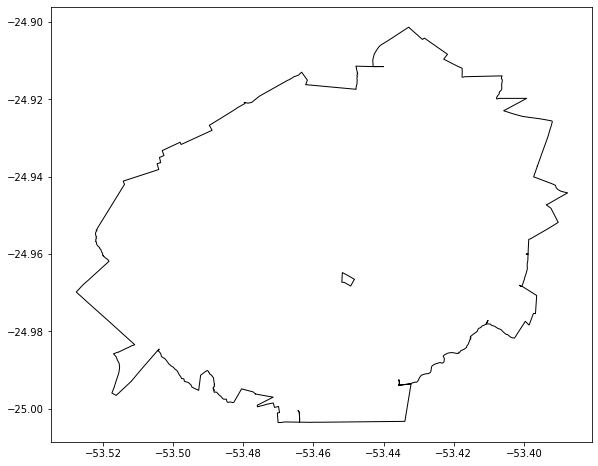

In [436]:
perimetro_urbano.plot(color='white', edgecolor='black', figsize=(15, 8))

In [437]:
perimetro_urbano.to_file('processed/CASCAVEL-PERIMETRO_URBANO.shp')

<ipython-input-437-7be417f01dc0>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  perimetro_urbano.to_file('processed/CASCAVEL-PERIMETRO_URBANO.shp')


# Gerando Visualizações dos Dados

Ajuda Folium https://python-visualization.github.io/folium/

Exemplos http://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/

In [438]:
!pip install folium

distutils: C:\Users\lpmod\anaconda3\envs\geo_env\Include\UNKNOWN
sysconfig: C:\Users\lpmod\anaconda3\envs\geo_env\Include
user = False
home = None
root = None
prefix = None
distutils: C:\Users\lpmod\anaconda3\envs\geo_env\Include\UNKNOWN
sysconfig: C:\Users\lpmod\anaconda3\envs\geo_env\Include
user = False
home = None
root = None
prefix = None


In [439]:
import folium

In [440]:
#cascavel = gpd.read_file('CASCAVEL-MUNIC.shp')
#geo_dados = gpd.read_file('DATASET.shp')
#setor = gpd.read_file('CASCAVEL-SETOR.shp')
#bairro = gpd.read_file('CASCAVEL-BAIRRO.shp')

In [441]:
crs = {'init': 'epsg:4326'}

In [442]:
setor = setor.fillna(0)

In [443]:
cascavel.to_crs(crs, inplace = True)

C:\Users\lpmod\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [444]:
cascavel.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [445]:
y = cascavel.centroid.y.iloc[0]
y

<ipython-input-445-acbcfdc9857b>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  y = cascavel.centroid.y.iloc[0]


-25.029348161628405

In [446]:
x = cascavel.centroid.x.iloc[0]
x

<ipython-input-446-3291804f7c08>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  x = cascavel.centroid.x.iloc[0]


-53.379693153647025

In [447]:
cascavel

ID CD_GEOCODM NM_MUNICIP  \
0  246    4104808   CASCAVEL   

                                            geometry  
0  POLYGON ((-53.54721 -24.82437, -53.55726 -24.7...

## Mapa Camada Simples


In [448]:
base = folium.Map([y, x], zoom_start=10, tiles='OpenStreetMap')
base.choropleth(cascavel)
base

C:\Users\lpmod\anaconda3\envs\geo_env\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [449]:
bairro.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Mapa Com Popup

In [450]:
x2 = perimetro_urbano.centroid.x.iloc[0]
y2 = perimetro_urbano.centroid.y.iloc[0]

<ipython-input-450-752b57df5eb8>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  x2 = perimetro_urbano.centroid.x.iloc[0]
<ipython-input-450-752b57df5eb8>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  y2 = perimetro_urbano.centroid.y.iloc[0]


In [451]:
base = folium.Map([y2, x2], zoom_start=12, tiles='OpenStreetMap')
for i in range(len(bairro)):
    geojson_cascavel = folium.GeoJson(bairro.geometry.iloc[i])
    geojson_cascavel.add_child(folium.Popup(bairro.NM_BAIRRO.iloc[i]))
    geojson_cascavel.add_to(base)
base

## Mapas com Várias Camadas (Bairros)

In [452]:
bairro

NM_BAIRRO                                           geometry  \
0              ALTO ALEGRE  POLYGON ((-53.49250 -24.97129, -53.49249 -24.9...   
1              BRASMADEIRA  POLYGON ((-53.44124 -24.93010, -53.44075 -24.9...   
2                 BRASÍLIA  POLYGON ((-53.42641 -24.94455, -53.42666 -24.9...   
3                   CANADÁ  POLYGON ((-53.46336 -24.93823, -53.46355 -24.9...   
4                 CANCELLI  POLYGON ((-53.46623 -24.94702, -53.46692 -24.9...   
5           CASCAVEL VELHO  POLYGON ((-53.43638 -24.99042, -53.43598 -24.9...   
6                CATARATAS  POLYGON ((-53.39922 -24.96402, -53.39960 -24.9...   
7                   CENTRO  POLYGON ((-53.48007 -24.96468, -53.48083 -24.9...   
8                COQUEIRAL  POLYGON ((-53.48237 -24.95655, -53.48304 -24.9...   
9                  COUNTRY  POLYGON ((-53.45796 -24.94987, -53.45876 -24.9...   
10               ESMERALDA  POLYGON ((-53.50188 -24.97809, -53.50181 -24.9...   
11                FLORESTA  POLYGON ((-53.42039 -24.92948, -53.42065 -24.9...   
12                 GUARUJÁ  POLYGON ((-53.49535 -24.99349, -53.49575 -24.9...   
13              INTERLAGOS  POLYGON ((-53.43605 -24.92202, -53.43672 -24.9...   
14             MARIA LUÍZA  POLYGON ((-53.45373 -24.97967, -53.45380 -24.9...   
15                 MORUMBI  POLYGON ((-53.40620 -24.94467, -53.40634 -24.9...   
16                    NEVA  POLYGON ((-53.47496 -24.97953, -53.47501 -24.9...   
17                PACAEMBU  POLYGON ((-53.40926 -24.96455, -53.40942 -24.9...   
18        PARQUE SÃO PAULO  POLYGON ((-53.45926 -24.98247, -53.45973 -24.9...   
19            PARQUE VERDE  POLYGON ((-53.49154 -24.94265, -53.49101 -24.9...   
20                 PERIOLO  POLYGON ((-53.41437 -24.95151, -53.41481 -24.9...   
21  PIONEIROS CATARINENSES  POLYGON ((-53.49392 -24.97932, -53.49500 -24.9...   
22    QUATORZE DE NOVEMBRO  POLYGON ((-53.48311 -24.98984, -53.48333 -24.9...   
23        RECANTO TROPICAL  MULTIPOLYGON (((-53.49299 -24.94774, -53.49428...   
24          REGIÃO DO LAGO  POLYGON ((-53.44110 -24.97038, -53.44174 -24.9...   
25              SANTA CRUZ  POLYGON ((-53.50146 -24.95691, -53.50030 -24.9...   
26        SANTA FELICIDADE  POLYGON ((-53.46410 -25.00267, -53.46414 -25.0...   
27            SANTO INÁCIO  POLYGON ((-53.50305 -24.95349, -53.50272 -24.9...   
28           SANTOS DUMONT  POLYGON ((-53.51591 -24.98530, -53.51556 -24.9...   
29           SÃO CRISTÓVÃO  MULTIPOLYGON (((-53.42159 -24.95287, -53.42222...   
30           UNIVERSITÁRIO  POLYGON ((-53.43799 -25.00319, -53.45783 -25.0...   

       V002  populacao_corrigida  
0    7927.0               7927.0  
1    6808.0               6808.0  
2   11299.0              11299.0  
3    4291.0               4291.0  
4   10138.0              10138.0  
5   13276.0              13276.0  
6    5509.0               5509.0  
7   24335.0              24335.0  
8    7878.0               7878.0  
9    4415.0               4415.0  
10   5501.0               5501.0  
11  13154.0              13154.0  
12   8473.0               8473.0  
13  12651.0              12651.0  
14   5048.0               5048.0  
15   5328.0               5328.0  
16  11670.0              11670.0  
17   5354.0               5354.0  
18  10340.0              10340.0  
19   5567.0               5567.0  
20   9533.0               9533.0  
21   4724.0               4724.0  
22   4968.0               4968.0  
23   5963.0               5963.0  
24   7458.0               7458.0  
25  14691.0              14691.0  
26  14414.0              14414.0  
27   1500.0               1500.0  
28   1981.0               1981.0  
29   8975.0               8975.0  
30  12716.0              12716.0

In [453]:
bairro.to_crs(crs, inplace=True)

C:\Users\lpmod\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [454]:
bairro

NM_BAIRRO                                           geometry  \
0              ALTO ALEGRE  POLYGON ((-53.49250 -24.97129, -53.49249 -24.9...   
1              BRASMADEIRA  POLYGON ((-53.44124 -24.93010, -53.44075 -24.9...   
2                 BRASÍLIA  POLYGON ((-53.42641 -24.94455, -53.42666 -24.9...   
3                   CANADÁ  POLYGON ((-53.46336 -24.93823, -53.46355 -24.9...   
4                 CANCELLI  POLYGON ((-53.46623 -24.94702, -53.46692 -24.9...   
5           CASCAVEL VELHO  POLYGON ((-53.43638 -24.99042, -53.43598 -24.9...   
6                CATARATAS  POLYGON ((-53.39922 -24.96402, -53.39960 -24.9...   
7                   CENTRO  POLYGON ((-53.48007 -24.96468, -53.48083 -24.9...   
8                COQUEIRAL  POLYGON ((-53.48237 -24.95655, -53.48304 -24.9...   
9                  COUNTRY  POLYGON ((-53.45796 -24.94987, -53.45876 -24.9...   
10               ESMERALDA  POLYGON ((-53.50188 -24.97809, -53.50181 -24.9...   
11                FLORESTA  POLYGON ((-53.42039 -24.92948, -53.42065 -24.9...   
12                 GUARUJÁ  POLYGON ((-53.49535 -24.99349, -53.49575 -24.9...   
13              INTERLAGOS  POLYGON ((-53.43605 -24.92202, -53.43672 -24.9...   
14             MARIA LUÍZA  POLYGON ((-53.45373 -24.97967, -53.45380 -24.9...   
15                 MORUMBI  POLYGON ((-53.40620 -24.94467, -53.40634 -24.9...   
16                    NEVA  POLYGON ((-53.47496 -24.97953, -53.47501 -24.9...   
17                PACAEMBU  POLYGON ((-53.40926 -24.96455, -53.40942 -24.9...   
18        PARQUE SÃO PAULO  POLYGON ((-53.45926 -24.98247, -53.45973 -24.9...   
19            PARQUE VERDE  POLYGON ((-53.49154 -24.94265, -53.49101 -24.9...   
20                 PERIOLO  POLYGON ((-53.41437 -24.95151, -53.41481 -24.9...   
21  PIONEIROS CATARINENSES  POLYGON ((-53.49392 -24.97932, -53.49500 -24.9...   
22    QUATORZE DE NOVEMBRO  POLYGON ((-53.48311 -24.98984, -53.48333 -24.9...   
23        RECANTO TROPICAL  MULTIPOLYGON (((-53.49299 -24.94774, -53.49428...   
24          REGIÃO DO LAGO  POLYGON ((-53.44110 -24.97038, -53.44174 -24.9...   
25              SANTA CRUZ  POLYGON ((-53.50146 -24.95691, -53.50030 -24.9...   
26        SANTA FELICIDADE  POLYGON ((-53.46410 -25.00267, -53.46414 -25.0...   
27            SANTO INÁCIO  POLYGON ((-53.50305 -24.95349, -53.50272 -24.9...   
28           SANTOS DUMONT  POLYGON ((-53.51591 -24.98530, -53.51556 -24.9...   
29           SÃO CRISTÓVÃO  MULTIPOLYGON (((-53.42159 -24.95287, -53.42222...   
30           UNIVERSITÁRIO  POLYGON ((-53.43799 -25.00319, -53.45783 -25.0...   

       V002  populacao_corrigida  
0    7927.0               7927.0  
1    6808.0               6808.0  
2   11299.0              11299.0  
3    4291.0               4291.0  
4   10138.0              10138.0  
5   13276.0              13276.0  
6    5509.0               5509.0  
7   24335.0              24335.0  
8    7878.0               7878.0  
9    4415.0               4415.0  
10   5501.0               5501.0  
11  13154.0              13154.0  
12   8473.0               8473.0  
13  12651.0              12651.0  
14   5048.0               5048.0  
15   5328.0               5328.0  
16  11670.0              11670.0  
17   5354.0               5354.0  
18  10340.0              10340.0  
19   5567.0               5567.0  
20   9533.0               9533.0  
21   4724.0               4724.0  
22   4968.0               4968.0  
23   5963.0               5963.0  
24   7458.0               7458.0  
25  14691.0              14691.0  
26  14414.0              14414.0  
27   1500.0               1500.0  
28   1981.0               1981.0  
29   8975.0               8975.0  
30  12716.0              12716.0

In [499]:
base = folium.Map([y2, x2], zoom_start=12, tiles='OpenStreetMap')
for i in range(len(bairro)):
  geo = folium.GeoJson(bairro[i: i + 1], name=bairro['NM_BAIRRO'][i])
  label = '{} / {} habitantes'.format(bairro['NM_BAIRRO'][i], bairro['populacao_corrigida'][i])
  folium.Popup(label).add_to(geo)
  geo.add_to(base)

folium.LayerControl().add_to(base)


base.save('processed/Dataset_Bairros(CASCAVEL).html')
base

## Mapa com Marcadores

In [456]:
geo_dados.columns

Index(['PEDIDO', 'DATA', 'CLIENTE', 'ENDERECO', 'BAIRRO', 'TOTAL_PROD',
       'COMISSAO', 'FRETE', 'OUTROS', 'DESCONTO', 'TOTAL', 'PAGO',
       'OBSERVACAO', 'LATITUDE', 'LONGITUDE', 'geometry', 'index_right', 'ID1',
       'CD_GEOCODI', 'TIPO', 'CD_GEOCODB', 'NM_BAIRRO', 'CD_GEOCODD',
       'NM_DISTRIT', 'CD_GEOCODS', 'NM_SUBDIST', 'CD_GEOCODM', 'NM_MUNICIP',
       'NM_MESO', 'NM_MICRO', 'Cod_setor', 'Cod_Grandes Regiões',
       'Nome_Grande_Regiao', 'Cod_UF', 'Nome_da_UF ', 'Cod_meso',
       'Nome_da_meso', 'Cod_micro', 'Nome_da_micro', 'Cod_RM', 'Nome_da_RM',
       'Cod_municipio', 'Nome_do_municipio', 'Cod_distrito',
       'Nome_do_distrito', 'Cod_subdistrito', 'Nome_do_subdistrito',
       'Cod_bairro', 'Nome_do_bairro', 'Situacao_setor', 'Tipo_setor', 'V001',
       'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010',
       'V011', 'V012'],
      dtype='object')

In [457]:
geo_dados_acumulado = geo_dados.groupby(["ENDERECO"])["TOTAL"].sum()
geo_dados_acumulado.sort_values()

ENDERECO
RUA LUCIDIO ANGELO NAZARI, 452          6.0
RUA OSVALDO ARANHA, 439                 6.0
RUA PARAGUAI, 1148 AP 21                7.0
RUA SILVINO BLENDER, 351                7.5
RUA DO BOSQUE, 748                      7.5
                                      ...  
RUA VALDEMAR BONN, 273 - APTO 103     173.0
RUA CURITIBA, 1540                    179.5
BR 277, KM522                         261.0
RUA PÚBLIO PIMENTEL, 750              434.5
A RETIRAR                            1686.0
Name: TOTAL, Length: 155, dtype: float64

https://fontawesome.com/icons

In [497]:
base = folium.Map([y2, x2], zoom_start=12, tiles='OpenStreetMap')
#base.choropleth(cascavel,
#                name='Cascavel', 
#                line_color='Black', 
#                line_weight=3, 
#                fill_opacity=0)

folium.Choropleth(
    geo_data=cascavel, #geopandas.read_file(us_states),
    fill_color='red',
    line_color='Black',
    fill_opacity=0.0,
    line_weight=2,
).add_to(base)

amostra = geo_dados #.sample(500)

for item in amostra.itertuples():
  base.add_child(folium.Marker(location=[item.LATITUDE, item.LONGITUDE],
                              popup="<h4>"+str(item.PEDIDO)+"</h4>" + "<h5>"+str(item.ENDERECO)+"</h5> <p>R$"+str(item.TOTAL)+"</p>",
                 icon=folium.Icon(color='red',
                                  prefix='fa',
                                  icon='fas fa-motorcycle' #icon='fas fa-home'   
                                  )
                 )
  )                                                        
folium.LayerControl().add_to(base)


base.save('processed/Dataset_Marcadores.html')
base

## Marcadores Clusterizados

In [459]:
from folium.plugins import MarkerCluster

In [496]:
base = folium.Map([y2, x2], zoom_start=12, tiles='OpenStreetMap')

folium.Choropleth(
    geo_data=bairro, #geopandas.read_file(us_states),
    fill_color='red',
    line_color='gray',
    fill_opacity=0.0,
    line_weight=2,
).add_to(base)

cluster = MarkerCluster()

for item in geo_dados.itertuples():
  cluster.add_child(folium.Marker(location=[item.LATITUDE, item.LONGITUDE],
                              popup="<h4>"+str(item.PEDIDO)+"</h4>" + "<h5>"+str(item.ENDERECO)+"</h5> <p>R$"+str(item.TOTAL)+"</p>",
                 icon=folium.Icon(color='red',
                                  prefix='fa',
                                  icon='fas fa-motorcycle' #icon='fas fa-home'   
                                  )
                 )
  )       
base.add_child(cluster)                                                 
folium.LayerControl().add_to(base)


base.save('processed/Dataset_MarcadoresClusterizados.html')
base

## Mapa de Calor

In [462]:
#cascavel = gpd.read_file('CASCAVEL-MUNIC.shp')
#setor = gpd.read_file('CASCAVEL-SETOR.shp')
#crs = {'init': 'epsg:4326'}
#cascavel.to_crs(crs, inplace=True)
#setor.to_crs(crs, inplace=True)
#setor.fillna(0, inplace=True)
#y = cascavel.centroid.y.iloc[0]
#x = cascavel.centroid.x.iloc[0]

In [464]:
data = []
for i in range(len(setor)):
    data.append([setor['geometry'][i].centroid.y,
                 setor['geometry'][i].centroid.x,
                 setor['V002'][i]/setor['V002'].max()])

In [465]:
len(geo_dados)

326

In [467]:
setor['V002'].max()

1964.0

In [468]:
bairro['populacao_corrigida'].max()

24335.0

In [469]:
geo_dados[0:]

PEDIDO    DATA           CLIENTE                ENDERECO  \
1     101.0  01/mai               NaN   RUA IRACI VIGANO, 281   
2     102.0  01/mai               NaN     TREZE DE MAIO, 1672   
3     103.0  04/mai       JOSI POMINI  RUA VASCO DA GAMA, 396   
4     104.0  04/mai               NaN    RUA DOS PARDAIS, 580   
5     105.0  04/mai  JEFERSON SARRETA      RUA CURITIBA, 1540   
..      ...     ...               ...                     ...   
366   469.0  31/mar            CLEUZA   RUA CAMPOS SALES, 387   
367   470.0  31/mar               NaN  RUA DAS AZALÉIAS, 1152   
368   471.0  31/mar               NaN        RUA GRAMADO, 355   
369   472.0  31/mar               NaN       RUA APINAJÉS, 363   
370   473.0  31/mar               NaN               A RETIRAR   

                    BAIRRO  TOTAL_PROD  COMISSAO  FRETE  OUTROS  DESCONTO  \
1             PARQUE VERDE        18.0       0.0    0.0     0.0       0.0   
2                      NaN        18.0       0.0    0.0     0.0       0.0   
3    PIONEIROS CATARINENSE        30.0       0.0    0.0     0.0       0.0   
4                 FLORESTA        10.5       0.0    3.5     0.0       0.0   
5                     NEVA        37.5       0.0    0.0     0.0       0.0   
..                     ...         ...       ...    ...     ...       ...   
366       PARQUE SÃO PAULO        35.0       0.0    0.0     0.0       0.0   
367                GUARUJÁ        14.0       0.0    0.0     0.0       0.0   
368              COQUEIRAL        13.3       0.0    0.0     0.0       0.3   
369             SANTA CRUZ        19.5       0.0    0.0     0.5       0.0   
370                    NaN        24.0       0.0    0.0     0.0       0.0   

     ...  V003  V004     V005         V006     V007         V008     V009  \
1    ...  2.75  1.34  2903.67   8890467.87  2959.78   8896220.40  1815.83   
2    ...  3.01  1.41  4240.29  19373979.69  4469.50  19396914.73  2286.30   
3    ...  2.97  1.82  1285.59   1192038.71  1364.56   1157381.10   888.38   
4    ...  3.50  6.01   660.05    946797.58   940.93   1086899.77   645.65   
5    ...  2.82  1.45  1742.48   6187401.53  2081.56   6688332.23  1549.75   
..   ...   ...   ...      ...          ...      ...          ...      ...   
366  ...  3.08  1.79  1302.83   1114875.89  1360.59   1085571.07   852.96   
367  ...  2.93  1.66  1352.12    879476.84  1421.90    825289.72   900.30   
368  ...  2.72  2.10  1914.10   4885883.28  1951.63   4908526.30  1195.73   
369  ...  3.24  2.18   944.94    802073.94  1015.59    790235.77   568.39   
370  ...  3.25  2.19  1488.21   1620705.73  1548.04   1593105.44   901.13   

            V010     V011         V012  
1     6143490.37  2499.26   6749334.72  
2    16046811.99  3380.88  20039959.43  
3      968283.83  1179.65    942113.92  
4      576528.84   914.47    570721.91  
5     4932059.42  2012.20   5474502.35  
..           ...      ...          ...  
366    988021.91  1183.27    979769.85  
367    775487.08  1167.88    693215.48  
368   2849488.03  1535.67   3138117.54  
369    488113.47   840.52    493092.18  
370   1289150.14  1269.57   1348622.24  

[326 rows x 63 columns]

In [470]:
geo_dados = geo_dados[geo_dados['BAIRRO'].notna()]

In [471]:
geo_dados

PEDIDO    DATA           CLIENTE                    ENDERECO  \
1     101.0  01/mai               NaN       RUA IRACI VIGANO, 281   
3     103.0  04/mai       JOSI POMINI      RUA VASCO DA GAMA, 396   
4     104.0  04/mai               NaN        RUA DOS PARDAIS, 580   
5     105.0  04/mai  JEFERSON SARRETA          RUA CURITIBA, 1540   
6     106.0  08/mai             COMIL               BR 277, KM522   
..      ...     ...               ...                         ...   
365   468.0  31/mar               NaN  RUA MANOEL DA NÓBREGA, 907   
366   469.0  31/mar            CLEUZA       RUA CAMPOS SALES, 387   
367   470.0  31/mar               NaN      RUA DAS AZALÉIAS, 1152   
368   471.0  31/mar               NaN            RUA GRAMADO, 355   
369   472.0  31/mar               NaN           RUA APINAJÉS, 363   

                    BAIRRO  TOTAL_PROD  COMISSAO  FRETE  OUTROS  DESCONTO  \
1             PARQUE VERDE        18.0       0.0    0.0     0.0       0.0   
3    PIONEIROS CATARINENSE        30.0       0.0    0.0     0.0       0.0   
4                 FLORESTA        10.5       0.0    3.5     0.0       0.0   
5                     NEVA        37.5       0.0    0.0     0.0       0.0   
6        PARQUE INDUSTRIAL       132.0       0.0    0.0     0.0       0.0   
..                     ...         ...       ...    ...     ...       ...   
365       PARQUE SÃO PAULO        30.5       0.0    0.0     0.0       0.5   
366       PARQUE SÃO PAULO        35.0       0.0    0.0     0.0       0.0   
367                GUARUJÁ        14.0       0.0    0.0     0.0       0.0   
368              COQUEIRAL        13.3       0.0    0.0     0.0       0.3   
369             SANTA CRUZ        19.5       0.0    0.0     0.5       0.0   

     ...  V003  V004     V005        V006     V007        V008     V009  \
1    ...  2.75  1.34  2903.67  8890467.87  2959.78  8896220.40  1815.83   
3    ...  2.97  1.82  1285.59  1192038.71  1364.56  1157381.10   888.38   
4    ...  3.50  6.01   660.05   946797.58   940.93  1086899.77   645.65   
5    ...  2.82  1.45  1742.48  6187401.53  2081.56  6688332.23  1549.75   
6    ...   NaN   NaN      NaN         NaN      NaN         NaN      NaN   
..   ...   ...   ...      ...         ...      ...         ...      ...   
365  ...  3.10  1.96  1427.33  2070472.52  1528.62  2062517.91   939.53   
366  ...  3.08  1.79  1302.83  1114875.89  1360.59  1085571.07   852.96   
367  ...  2.93  1.66  1352.12   879476.84  1421.90   825289.72   900.30   
368  ...  2.72  2.10  1914.10  4885883.28  1951.63  4908526.30  1195.73   
369  ...  3.24  2.18   944.94   802073.94  1015.59   790235.77   568.39   

           V010     V011        V012  
1    6143490.37  2499.26  6749334.72  
3     968283.83  1179.65   942113.92  
4     576528.84   914.47   570721.91  
5    4932059.42  2012.20  5474502.35  
6           NaN      NaN         NaN  
..          ...      ...         ...  
365  1829614.90  1325.88  2070476.40  
366   988021.91  1183.27   979769.85  
367   775487.08  1167.88   693215.48  
368  2849488.03  1535.67  3138117.54  
369   488113.47   840.52   493092.18  

[180 rows x 63 columns]

In [472]:
#data = []
#for i in range(len(bairro)):
#    data.append([bairro['geometry'][i].centroid.y,
#                 bairro['geometry'][i].centroid.x,
#                 bairro['populacao_corrigida'][i]/bairro['populacao_corrigida'].max()])

In [473]:
data

[[-24.92569920955157, -53.44656567184584, 0.2774949083503055],
 [-24.919643666444355, -53.44467391697714, 0.560081466395112],
 [-24.92353698266282, -53.43736500848464, 0.5809572301425662],
 [-24.921589871808912, -53.43158482302838, 0.2805498981670061],
 [-24.920060951597456, -53.43498805451678, 0.5076374745417516],
 [-24.913093801917157, -53.438811932853476, 0.3940936863543788],
 [-24.90811836172687, -53.43337782061263, 0.5458248472505092],
 [-24.914371893018124, -53.42985306026663, 0.3630346232179226],
 [-24.91774960755349, -53.4327561577531, 0.2876782077393075],
 [-24.918091545228858, -53.438175391444474, 0.195010183299389],
 [-24.950165235913552, -53.43478480168786, 0.4119144602851324],
 [-24.95314195555584, -53.426277506698966, 0.48778004073319753],
 [-24.960041903951687, -53.44467696146989, 0.46334012219959264],
 [-24.951889437491417, -53.43917784265737, 0.3070264765784114],
 [-24.968513940237365, -53.44733630978952, 0.18635437881873726],
 [-24.973086353542154, -53.44319500095076,

In [474]:
geo_dados.columns

Index(['PEDIDO', 'DATA', 'CLIENTE', 'ENDERECO', 'BAIRRO', 'TOTAL_PROD',
       'COMISSAO', 'FRETE', 'OUTROS', 'DESCONTO', 'TOTAL', 'PAGO',
       'OBSERVACAO', 'LATITUDE', 'LONGITUDE', 'geometry', 'index_right', 'ID1',
       'CD_GEOCODI', 'TIPO', 'CD_GEOCODB', 'NM_BAIRRO', 'CD_GEOCODD',
       'NM_DISTRIT', 'CD_GEOCODS', 'NM_SUBDIST', 'CD_GEOCODM', 'NM_MUNICIP',
       'NM_MESO', 'NM_MICRO', 'Cod_setor', 'Cod_Grandes Regiões',
       'Nome_Grande_Regiao', 'Cod_UF', 'Nome_da_UF ', 'Cod_meso',
       'Nome_da_meso', 'Cod_micro', 'Nome_da_micro', 'Cod_RM', 'Nome_da_RM',
       'Cod_municipio', 'Nome_do_municipio', 'Cod_distrito',
       'Nome_do_distrito', 'Cod_subdistrito', 'Nome_do_subdistrito',
       'Cod_bairro', 'Nome_do_bairro', 'Situacao_setor', 'Tipo_setor', 'V001',
       'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010',
       'V011', 'V012'],
      dtype='object')

In [475]:
geo_dados_por_endereco = geo_dados.groupby(geo_dados['ENDERECO']).sum()

In [476]:
geo_dados.shape

(180, 63)

In [477]:
geo_dados_por_endereco.shape

(96, 33)

In [478]:
geo_dados.columns

Index(['PEDIDO', 'DATA', 'CLIENTE', 'ENDERECO', 'BAIRRO', 'TOTAL_PROD',
       'COMISSAO', 'FRETE', 'OUTROS', 'DESCONTO', 'TOTAL', 'PAGO',
       'OBSERVACAO', 'LATITUDE', 'LONGITUDE', 'geometry', 'index_right', 'ID1',
       'CD_GEOCODI', 'TIPO', 'CD_GEOCODB', 'NM_BAIRRO', 'CD_GEOCODD',
       'NM_DISTRIT', 'CD_GEOCODS', 'NM_SUBDIST', 'CD_GEOCODM', 'NM_MUNICIP',
       'NM_MESO', 'NM_MICRO', 'Cod_setor', 'Cod_Grandes Regiões',
       'Nome_Grande_Regiao', 'Cod_UF', 'Nome_da_UF ', 'Cod_meso',
       'Nome_da_meso', 'Cod_micro', 'Nome_da_micro', 'Cod_RM', 'Nome_da_RM',
       'Cod_municipio', 'Nome_do_municipio', 'Cod_distrito',
       'Nome_do_distrito', 'Cod_subdistrito', 'Nome_do_subdistrito',
       'Cod_bairro', 'Nome_do_bairro', 'Situacao_setor', 'Tipo_setor', 'V001',
       'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010',
       'V011', 'V012'],
      dtype='object')

In [479]:
geo_dados_por_endereco.columns

Index(['PEDIDO', 'TOTAL_PROD', 'COMISSAO', 'FRETE', 'OUTROS', 'DESCONTO',
       'TOTAL', 'LATITUDE', 'LONGITUDE', 'index_right', 'ID1',
       'Cod_Grandes Regiões', 'Cod_meso', 'Cod_micro', 'Cod_RM',
       'Cod_municipio', 'Cod_distrito', 'Cod_subdistrito', 'Cod_bairro',
       'Situacao_setor', 'Tipo_setor', 'V001', 'V002', 'V003', 'V004', 'V005',
       'V006', 'V007', 'V008', 'V009', 'V010', 'V011', 'V012'],
      dtype='object')

In [480]:
geo_dados_por_endereco['TOTAL'].sum()

3117.8999999999996

In [481]:
geo_dados['TOTAL'].sum()

3117.8999999999996

In [482]:
geo_dados_por_endereco.iloc[0]

PEDIDO                 8.820000e+02
TOTAL_PROD             2.800000e+01
COMISSAO               0.000000e+00
FRETE                  0.000000e+00
OUTROS                 0.000000e+00
DESCONTO               0.000000e+00
TOTAL                  2.800000e+01
LATITUDE              -4.994804e+01
LONGITUDE             -1.069565e+02
index_right            7.440000e+02
ID1                    4.046240e+05
Cod_Grandes Regiões    8.000000e+00
Cod_meso               8.212000e+03
Cod_micro              8.204600e+04
Cod_RM                 0.000000e+00
Cod_municipio          8.209616e+06
Cod_distrito           8.209616e+08
Cod_subdistrito        8.209616e+10
Cod_bairro             8.209616e+09
Situacao_setor         4.000000e+00
Tipo_setor             0.000000e+00
V001                   1.236000e+03
V002                   3.928000e+03
V003                   6.360000e+00
V004                   3.560000e+00
V005                   3.060680e+03
V006                   3.962606e+06
V007                   3.222

In [483]:
data_vendas = []
for i in range(len(geo_dados_por_endereco)):
    data_vendas.append([geo_dados_por_endereco['LATITUDE'][i],
                 geo_dados_por_endereco['LONGITUDE'][i],
                 geo_dados_por_endereco['TOTAL'][i]/geo_dados_por_endereco['TOTAL'].max()])

In [484]:
data_vendas

[[-49.94804, -106.9565, 0.08080808080808081],
 [-24.96826, -53.41551, 0.05483405483405483],
 [-75.00963, -160.57479, 0.7532467532467533],
 [-24.94406, -53.47582, 0.11544011544011544],
 [-24.93567, -53.50046, 0.04329004329004329],
 [-24.97268, -53.41683, 0.06637806637806638],
 [-24.97933, -53.51111, 0.03751803751803752],
 [-24.99214, -53.45613, 0.047619047619047616],
 [-24.96222, -53.50634, 0.05194805194805195],
 [-24.95926, -53.49985, 0.05772005772005772],
 [-24.92551, -53.42164, 0.09235209235209235],
 [-149.58174, -320.8095, 0.2049062049062049],
 [-49.98846, -106.95886, 0.10678210678210678],
 [-24.96742, -53.49442, 0.06637806637806638],
 [-74.96294999999999, -160.48353, 0.10678210678210678],
 [-24.98759, -53.49631, 0.046176046176046176],
 [-24.95865, -53.5068, 0.05483405483405483],
 [-24.96042, -53.50678, 0.03463203463203463],
 [-24.9621, -53.50194, 0.04040404040404041],
 [-24.93737, -53.49233, 0.04329004329004329],
 [-24.93486, -53.48918, 0.06926406926406926],
 [-24.97946, -53.4685, 

In [485]:
from folium.plugins import HeatMap

In [495]:
base = folium.Map([y2, x2], zoom_start=12, tiles='OpenStreetMap')
HeatMap(data_vendas, name='Vendas').add_to(base)
HeatMap(data, name='População').add_to(base)
folium.LayerControl().add_to(base)

base.save('processed/Dataset_HeatMap.html')
base